In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#pd.options.plotting.backend = "hvplot"
#import plotly.express as px
from idlescape import *
try:
    from ipywidgets import interact, widgets
except ImportError:
    %pip install ipywidgets
    from ipywidgets import interact, widgets

locationFile = "data/locations.json"
itemFile = "data/items.json"
player = Character(
    datafile=itemFile,
    fishing_level=72,
    fishing_bonus=18,
    fishing_set_bonus=0.0,
    bait_power=55.5,
    reel_power=47+15,
    bonus_rarity=21,
    mining_level=86,
    mining_set_bonus=0.25,
    mining_bonus=59,
    foraging_level=82,
    foraging_bonus=59,
    foraging_set_bonus=0.0,
    )
fishing = Fishing(player, locationFile);
mining = Mining(player, locationFile);
foraging = Foraging(player, locationFile);

In [2]:
interact(lambda x: setattr( player, 'fishing_level', x ), 
         x=widgets.IntSlider(min=1, max=200, value=player.fishing_level, description='Fishing Level'))
interact(lambda x: setattr( player, 'mining_level', x ), 
         x=widgets.IntSlider(min=1, max=200, value=player.mining_level, description='Mining Level'))
interact(lambda x: setattr( player, 'foraging_level', x ), 
         x=widgets.IntSlider(min=1, max=200, value=player.foraging_level, description='Foraging Level'))

interactive(children=(IntSlider(value=72, description='Fishing Level', max=200, min=1), Output()), _dom_classe…

interactive(children=(IntSlider(value=86, description='Mining Level', max=200, min=1), Output()), _dom_classes…

interactive(children=(IntSlider(value=82, description='Foraging Level', max=200, min=1), Output()), _dom_class…

<function __main__.<lambda>(x)>

Clay Pit  City Outskirts Mine  Village Quarry  \
Clay                      737.8                230.6             0.0   
Copper Ore                368.9                345.9             0.0   
Tin Ore                   368.9                345.9             0.0   
Stone                     184.5                230.6           720.5   
Sand                      276.7                230.6             0.0   
Fat Nightcrawler Bait      18.4                 11.5            11.5   
Iron Ore                    0.0                 57.6           576.4   
Coal                        0.0                 57.6           432.3   
Mithril Ore                 0.0                  0.0             0.0   
Silver                      0.0                  0.0             0.0   
Salt                        0.0                  0.0             0.0   
Rune Slate                  0.0                  0.0             0.0   
Gold Ore                    0.0                  0.0             0.0   
Adamantite Ore              0.0                  0.0             0.0   
Runite Ore                  0.0                  0.0             0.0   
Stygian Ore                 0.0                  0.0             0.0   
Void Stone                  0.0                  0.0             0.0   

                       Desert Mine  Underground Mine  Hidden Mine  \
Clay                          33.0               0.0          0.0   
Copper Ore                     0.0               0.0          0.0   
Tin Ore                        0.0               0.0          0.0   
Stone                          0.0              77.6         93.2   
Sand                         366.2               0.0          0.0   
Fat Nightcrawler Bait          0.0               0.0          0.0   
Iron Ore                      65.9              38.8          0.0   
Coal                          73.2              38.8          0.0   
Mithril Ore                  146.5             232.9         62.1   
Silver                       146.5              97.0        124.2   
Salt                          73.2             155.2          0.0   
Rune Slate                    65.9             116.4         62.1   
Gold Ore                      36.6             135.8         62.1   
Adamantite Ore                 0.0               0.0        217.4   
Runite Ore                     0.0               0.0         31.0   
Stygian Ore                    0.0               0.0          0.0   
Void Stone                     0.0               0.0          0.0   

                       Volcano Mine  Slate Spires  Deep Pit  
Clay                            0.0           0.0       0.0  
Copper Ore                      0.0           0.0       0.0  
Tin Ore                         0.0           0.0       0.0  
Stone                           0.0         285.2       0.0  
Sand                            0.0         285.2       0.0  
Fat Nightcrawler Bait           0.0           0.0       0.0  
Iron Ore                        0.0           0.0       0.0  
Coal                            0.0           0.0       0.0  
Mithril Ore                   124.2           0.0       0.0  
Silver                        124.2           0.0       0.0  
Salt                            0.0           0.0       0.0  
Rune Slate                     62.1        2376.3      69.9  
Gold Ore                       62.1           0.0     104.8  
Adamantite Ore                124.2           0.0       0.0  
Runite Ore                    124.2           0.0     232.9  
Stygian Ore                     0.0           0.0      69.9  
Void Stone                      0.0           0.0      23.3

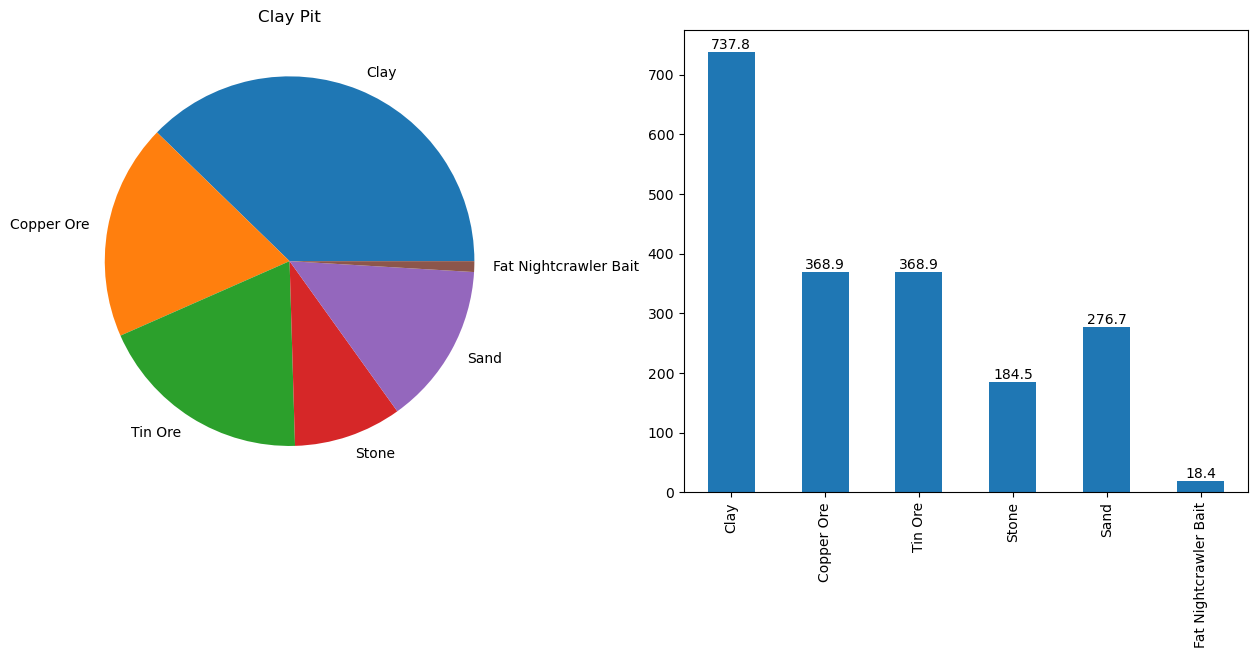

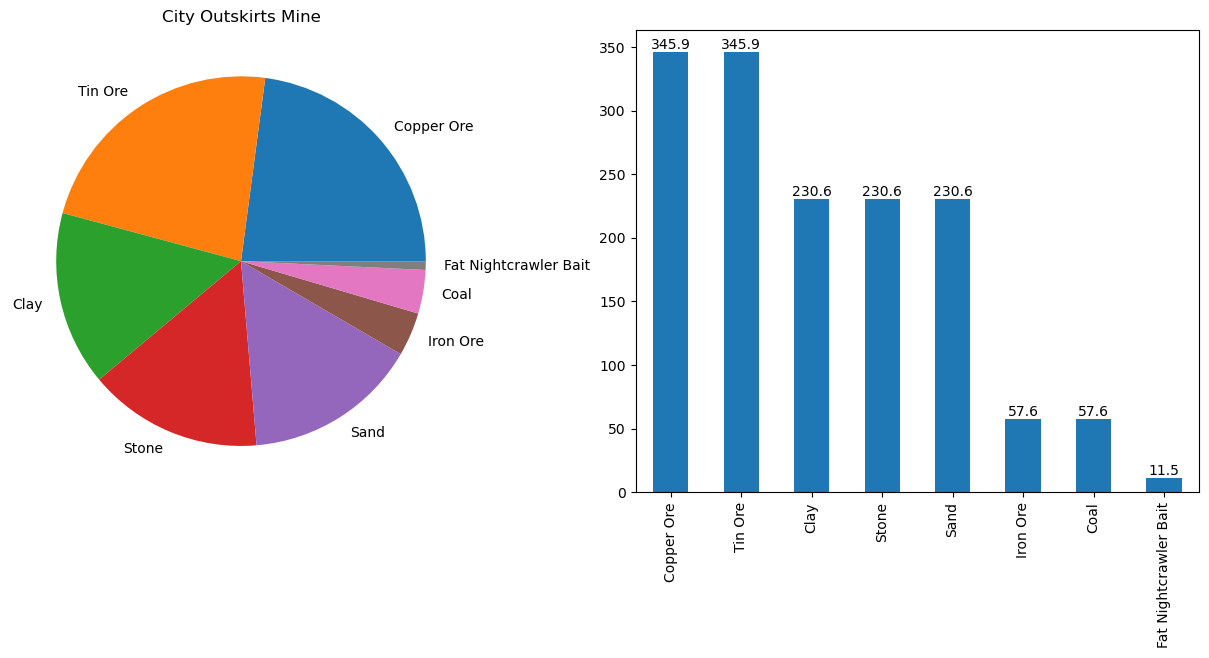

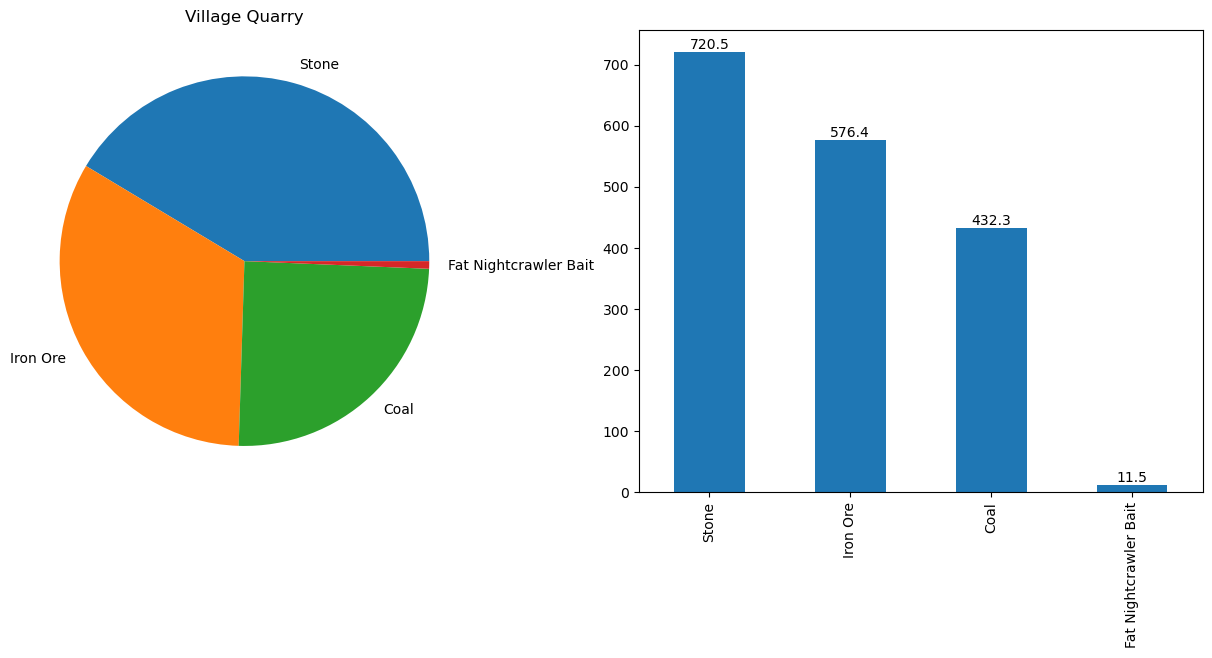

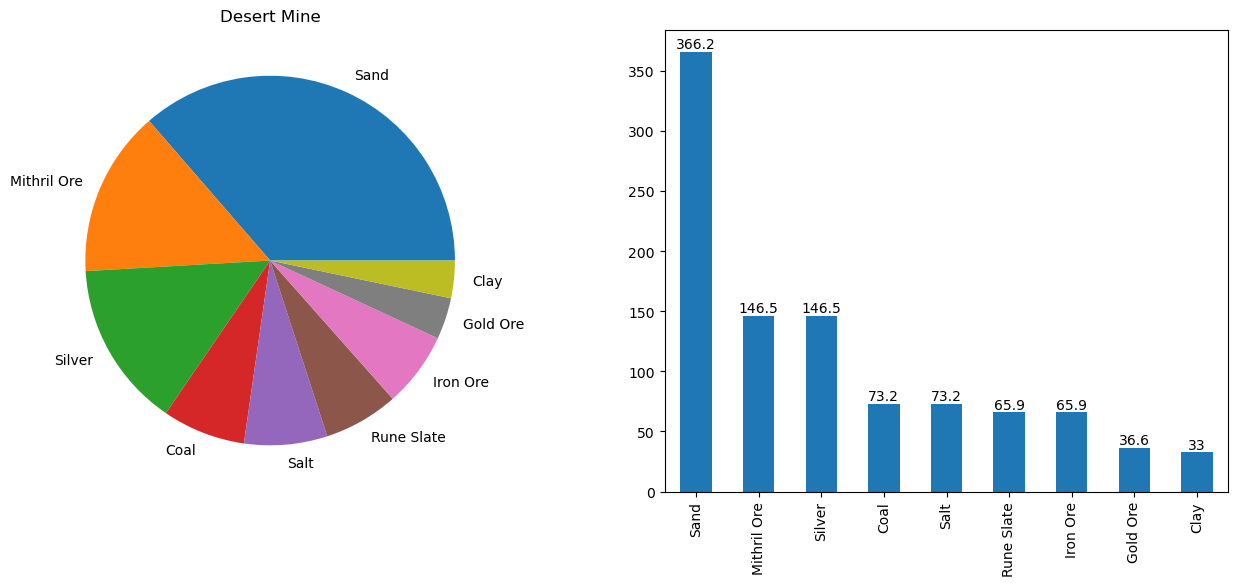

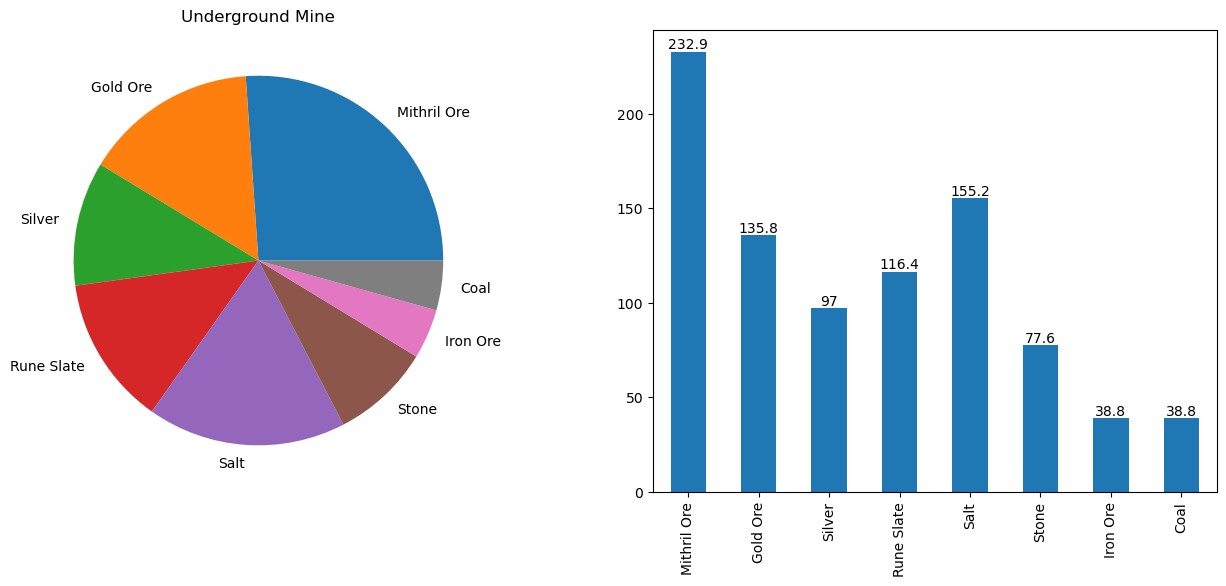

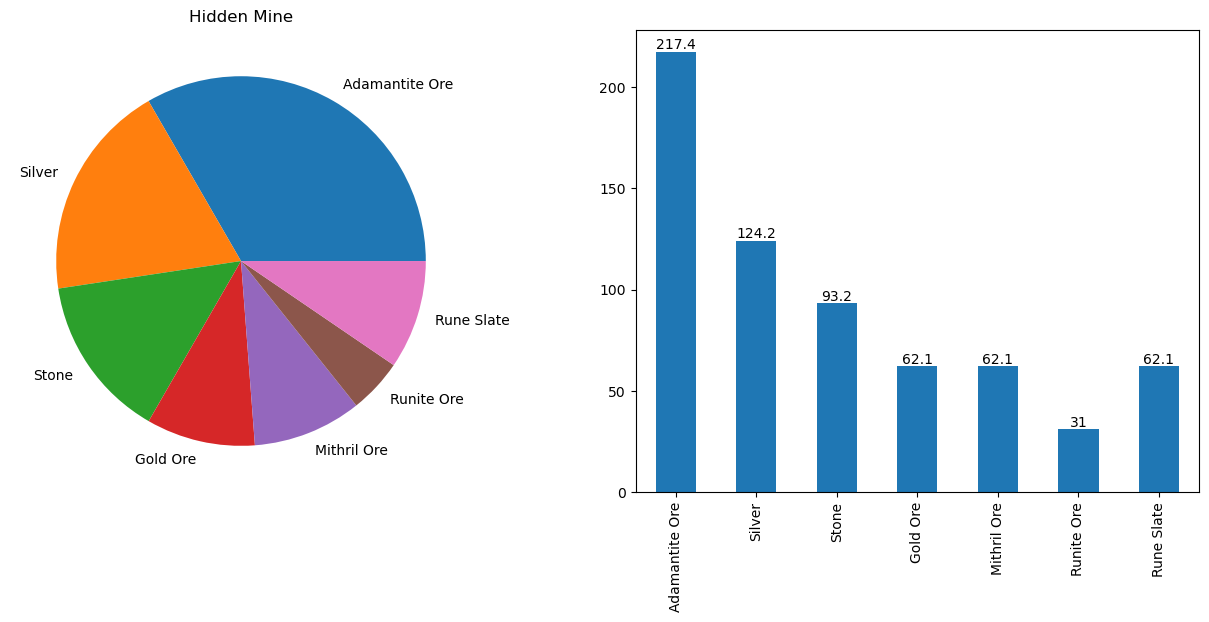

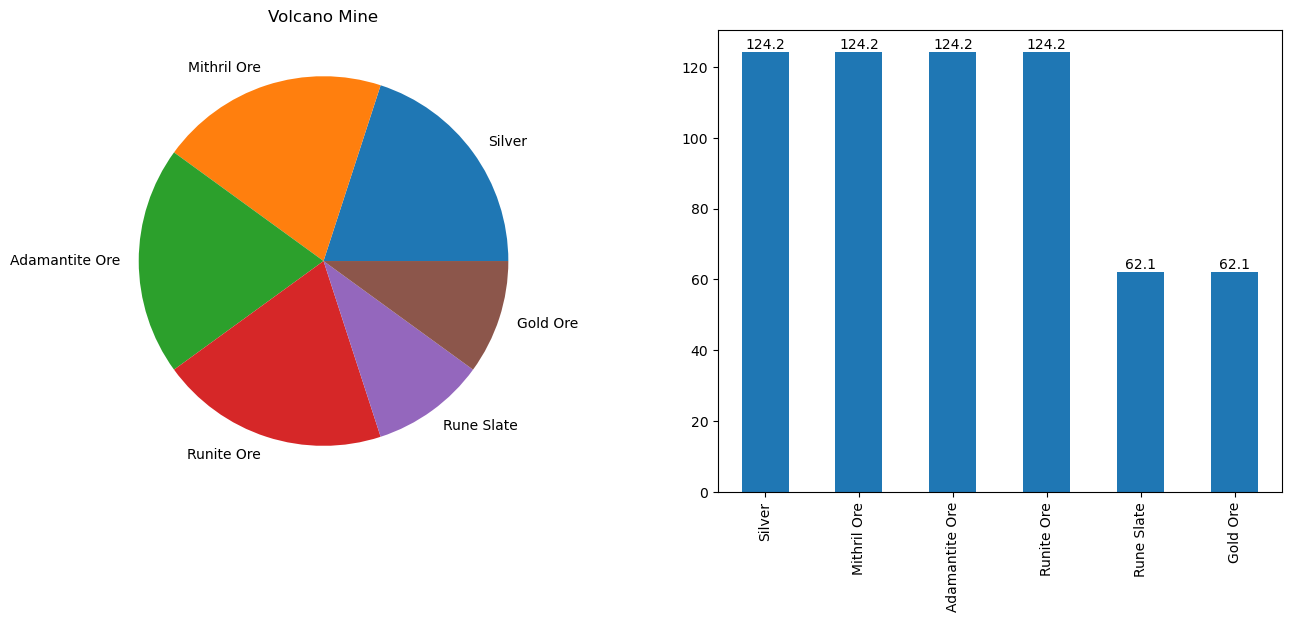

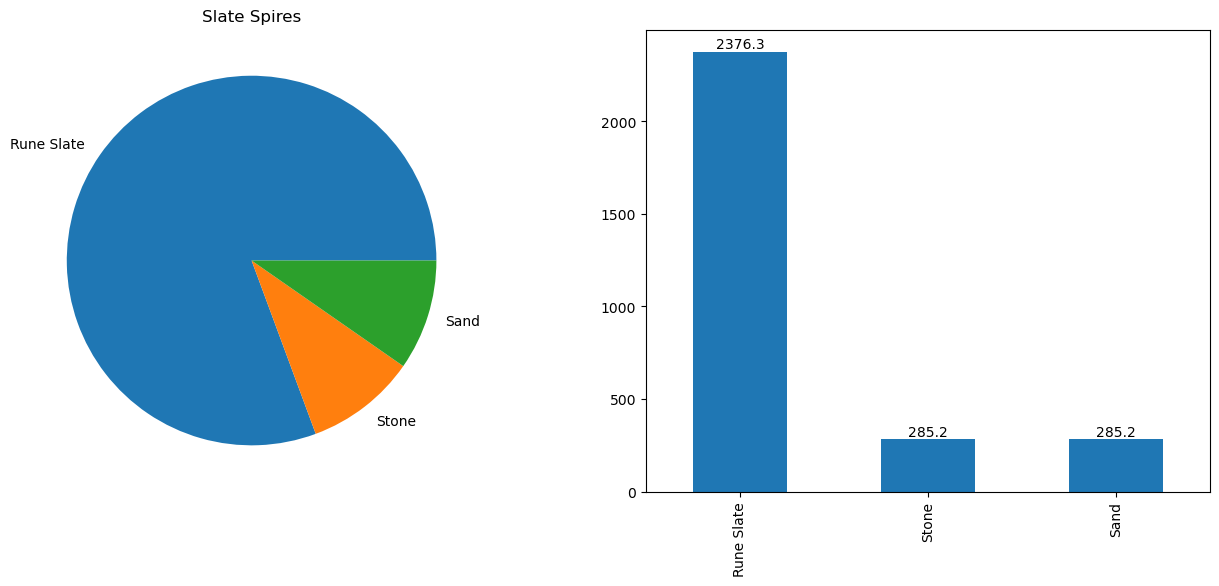

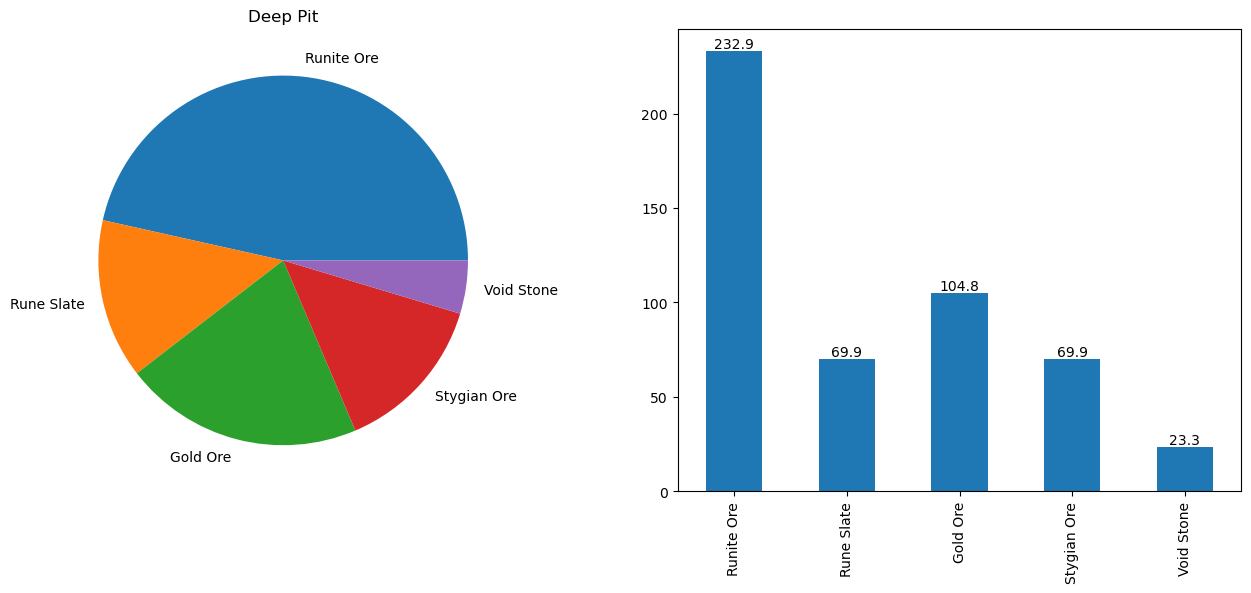

In [17]:
def zone_summary(action, zone):
    item_series = action.location_item_histogram(zone, interval='hour').round(1)
    fig_size = (16, 6)
    if( item_series.sum() > 0 ):
        fig, axs = plt.subplots(1,2, figsize=(16,6))
        axs[0].set_title(zone)
        item_series.plot.pie(ax=axs[0])
        item_series.plot.bar(ax=axs[1])
        axs[1].bar_label(axs[1].containers[0])
    return item_series
        
def action_summary(action, **kwargs):
    series_list = []
    indices = action.list_of_actions()
    for action_name in indices:
        series_list.append(zone_summary(action, action_name))
    df = pd.DataFrame(series_list, index=indices).fillna(0)
    display(df.transpose())
        
action_summary(mining)

Grasslands  Verdant Valley  Fungal Grotto  The Tangle  \
Carrot Seed                43.5            19.6           42.1         0.0   
Honey                      29.7            88.9            0.0         0.0   
Carrot                     28.5            15.8          116.7         0.0   
Potato                     28.5             0.0          116.7         0.0   
Potato Seed                36.7             0.0           42.1         0.0   
Wildberry                  70.3             0.0            0.0         0.0   
Wildberry Bush Seed        37.3             0.0            0.0         0.0   
Branch                   1227.4           748.9          209.9       128.6   
Log                       593.1           247.6           85.2       128.6   
Glowbug Bait               52.4            36.7           20.0         5.6   
Tomato                      0.0            15.8            0.0         0.0   
Tomato Seed                 0.0            19.6            0.0         0.0   
Wheat                       0.0            29.5            0.0         0.0   
Wheat Seed                  0.0            20.0            0.0         0.0   
Tree Seed                   0.0             7.2           19.4         0.0   
Oak Log                     0.0           234.4           85.2       128.6   
Watermelon                  0.0            30.5            0.0         0.0   
Pineapple                   0.0            30.5            0.0         0.0   
Four-leaf Clover            0.0             0.8            0.0         0.0   
Onion                       0.0            40.7            0.0         0.0   
Mana Berry                  0.0             3.4            0.0         0.0   
Mushroom                    0.0             0.0          176.1         0.0   
Mushroom Spore              0.0             0.0           43.6         0.0   
Oak Tree Seed               0.0             0.0           19.4         0.0   
Willow Tree Seed            0.0             0.0           19.4         0.0   
Banana Tree Seed            0.0             0.0           19.4        10.2   
Apple Tree Seed             0.0             0.0           19.4        10.2   
Glow Spore Shroom           0.0             0.0          267.9         0.0   
Willow Log                  0.0             0.0           85.2       128.6   
Chili Pepper                0.0             0.0            0.0        18.2   
Chili Pepper Seed           0.0             0.0            0.0        17.9   
Apple                       0.0             0.0            0.0        14.7   
Banana                      0.0             0.0            0.0        14.7   
Sugarcane Seed              0.0             0.0            0.0        20.4   
Maple Log                   0.0             0.0            0.0       128.6   
Tangle Root                 0.0             0.0            0.0        21.4   
Thorny Root                 0.0             0.0            0.0        21.4   
Thorny Vine                 0.0             0.0            0.0        21.4   
Yellow Pepper               0.0             0.0            0.0        23.4   
Pumpkin                     0.0             0.0            0.0         0.0   
Pumpkin Seed                0.0             0.0            0.0         0.0   
Rice                        0.0             0.0            0.0         0.0   
Rice Seed                   0.0             0.0            0.0         0.0   
Peppercorn Seed             0.0             0.0            0.0         0.0   
Maple Tree Seed             0.0             0.0            0.0         0.0   
Frost Flowers               0.0             0.0            0.0         0.0   
Snow                        0.0             0.0            0.0         0.0   
Yew Tree Seed               0.0             0.0            0.0         0.0   
Yew Log                     0.0             0.0            0.0         0.0   
Mandrake                    0.0             0.0            0.0         0.0   
Black Berry                 0.0            

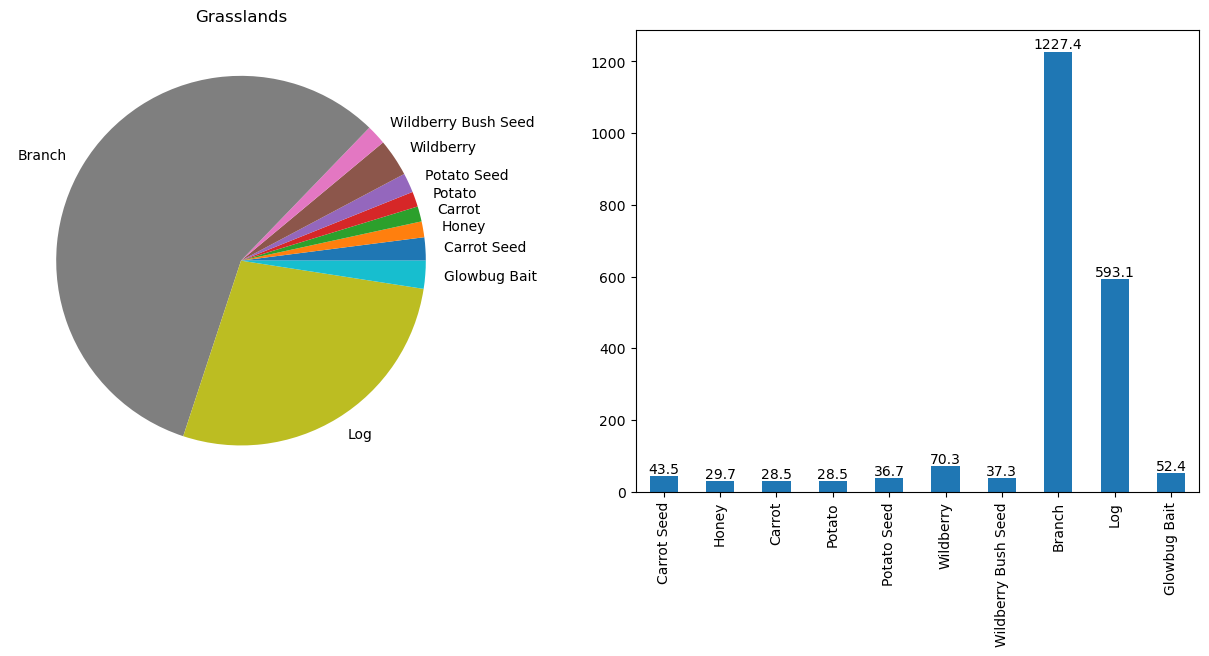

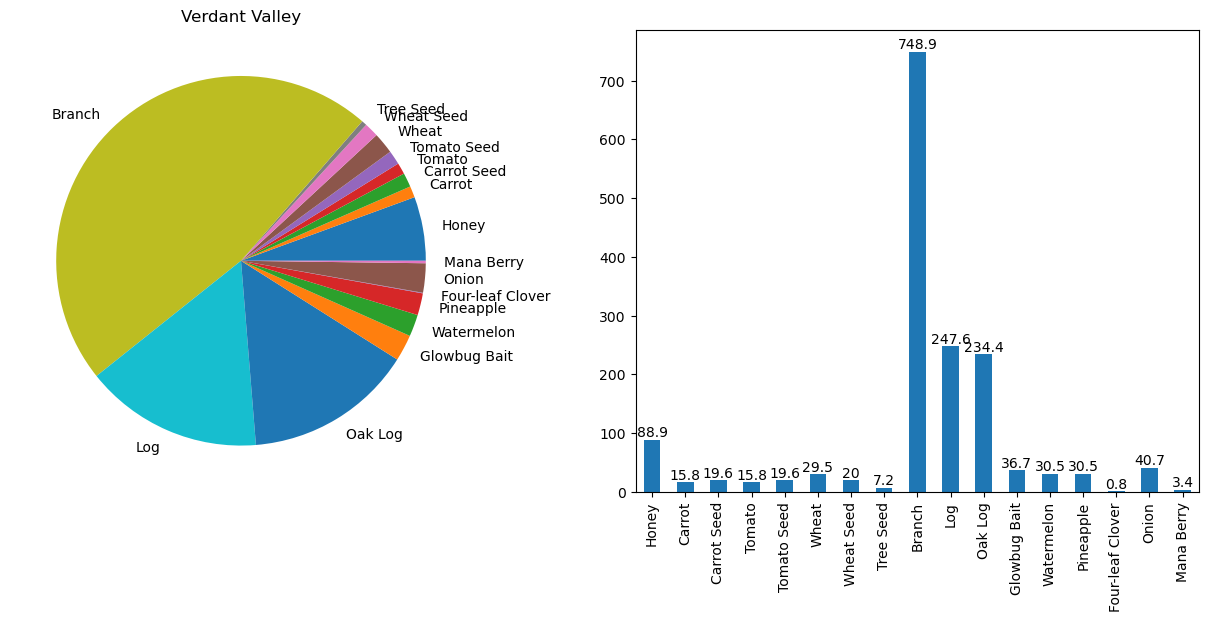

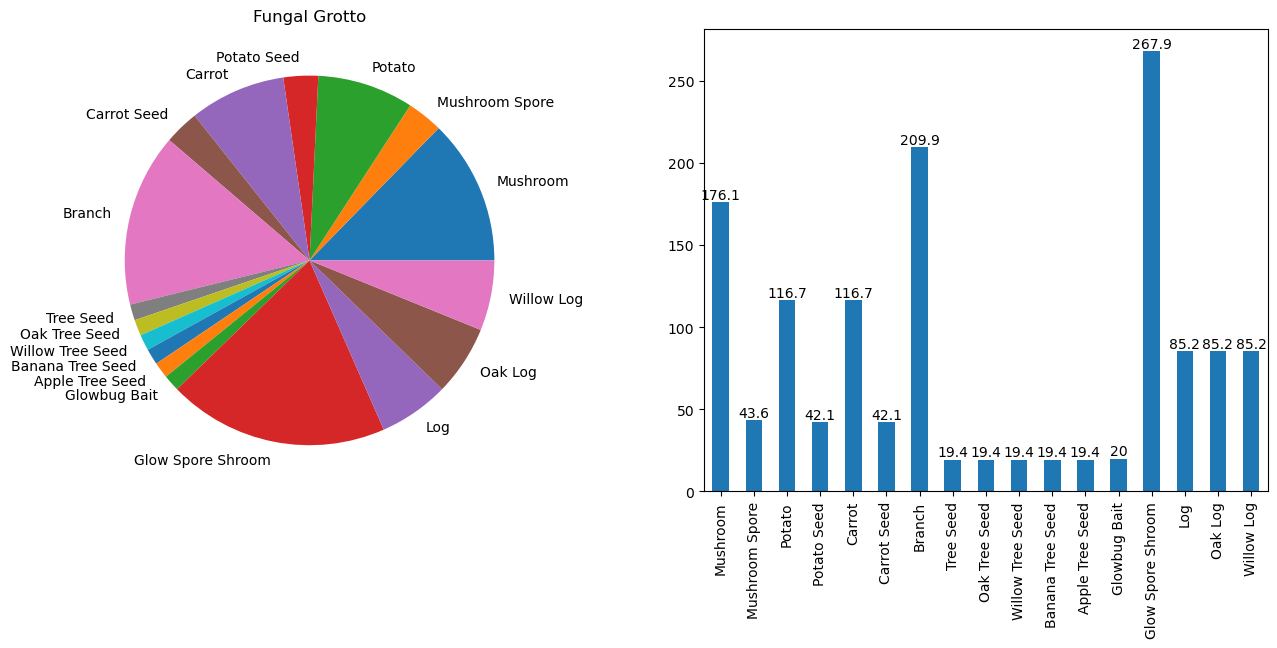

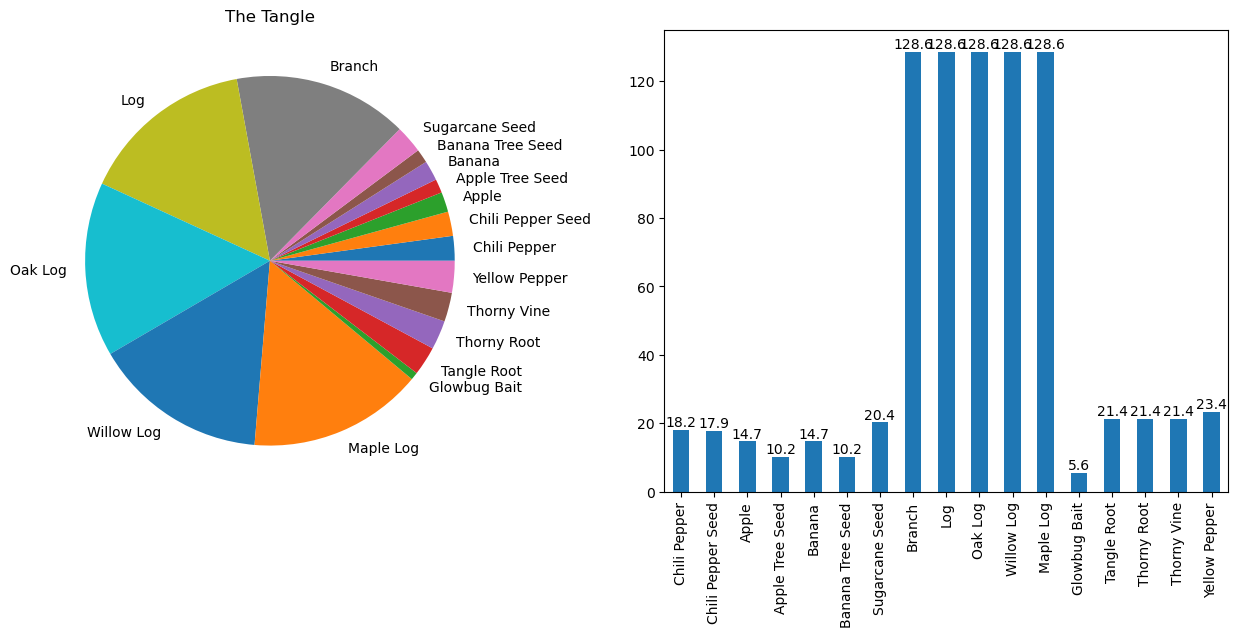

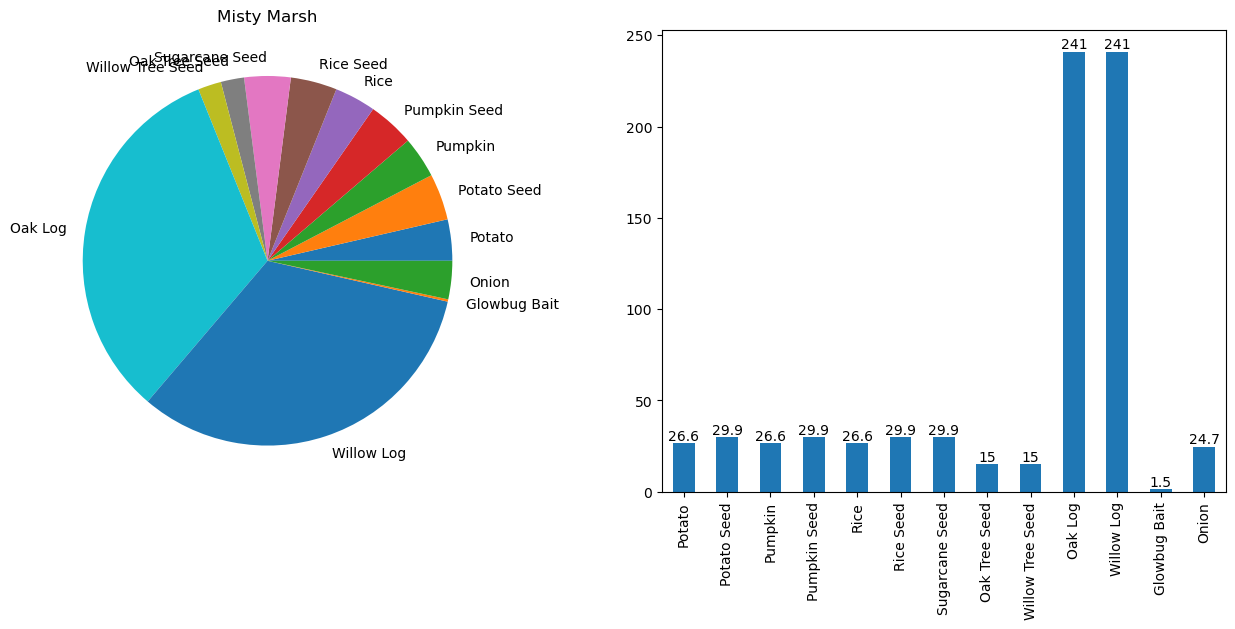

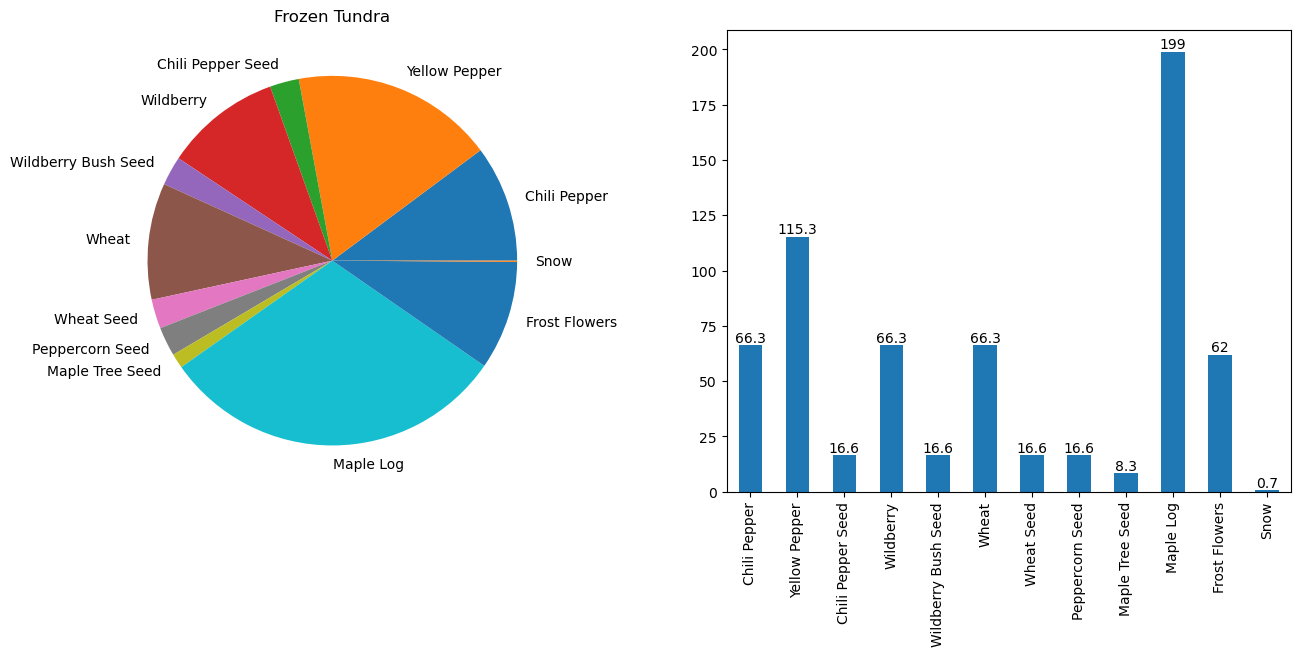

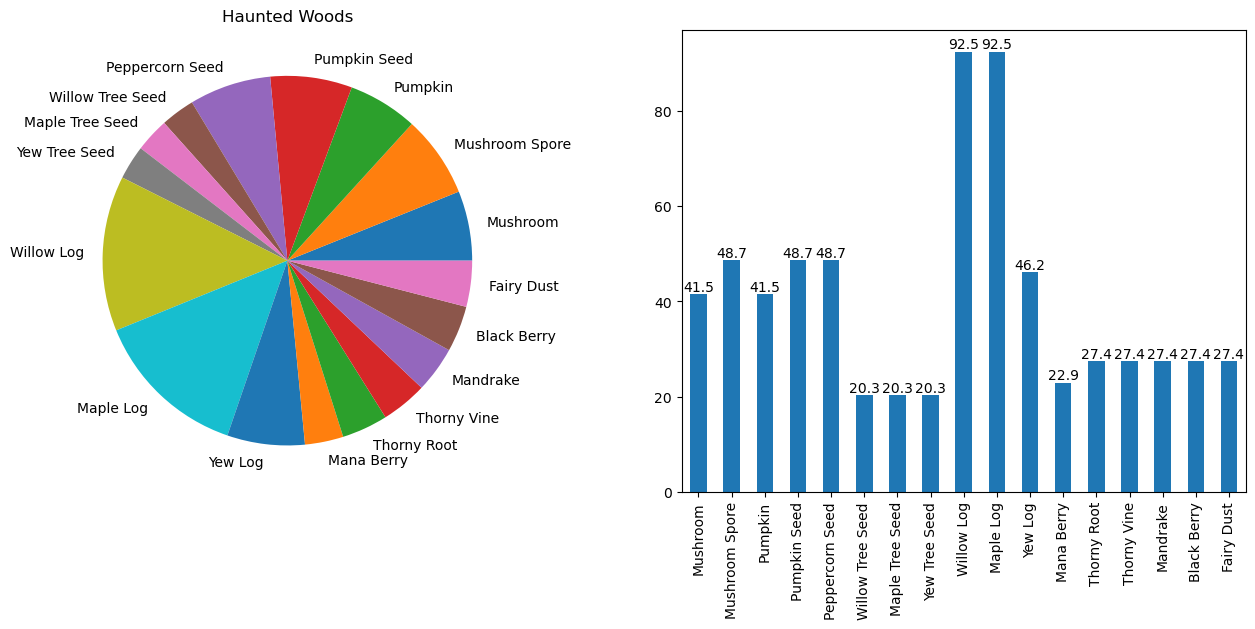

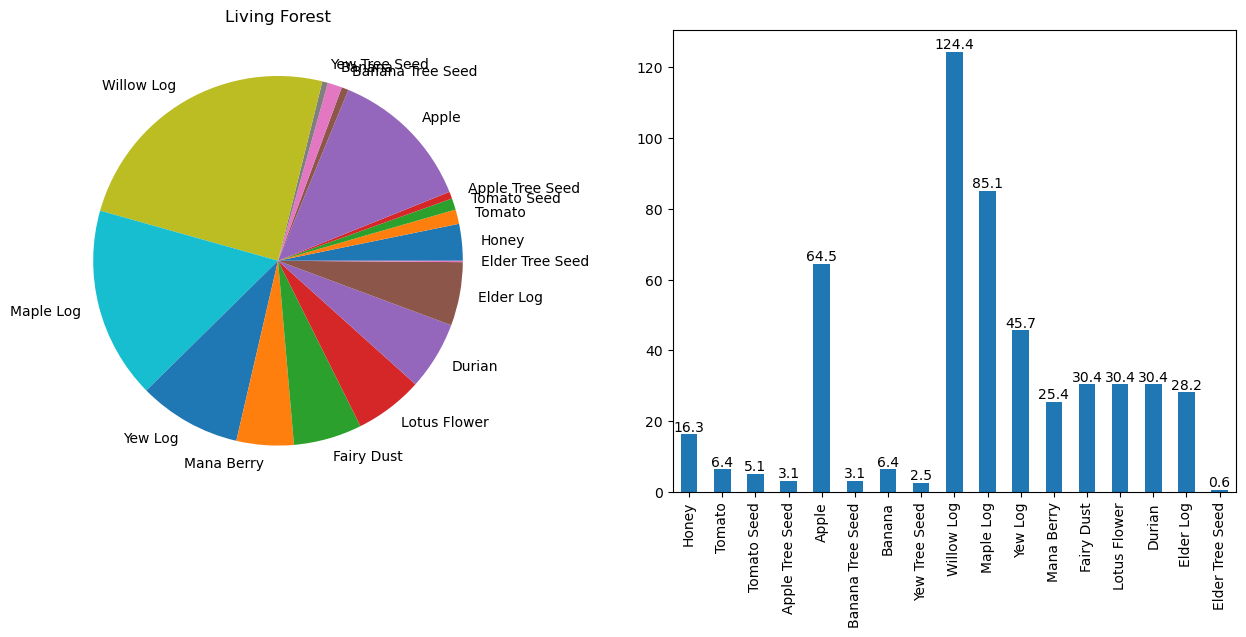

In [18]:
action_summary(foraging)

Shallow Pond  Lazy River  Still Lake  Open Ocean  \
Raw Shrimp                    286.3         0.0         0.0         0.0   
Raw Anchovy                   140.2         0.0         0.0         0.0   
Raw Magnetic Minnow            27.5        30.3        16.9         0.0   
Seaweed                        44.7        18.0        10.8        10.7   
Aqueous Grass                  43.0        28.7        19.6        10.0   
Rotten Driftwood               34.1        26.9         8.5        13.8   
Water Weeds                    13.3        39.4        17.5        10.0   
Raw Trout                       0.0       167.4         0.0         0.0   
Raw Salmon                      0.0       147.8         0.0         0.0   
Raw Tigerfish                   0.0         6.2         0.0         0.0   
Sturdy Driftwood                0.0         9.0         8.5        14.8   
Aquamarine                      0.0         0.0         0.0         0.0   
River Vines                     0.0        10.7        22.0        10.0   
Raw Lobster                     0.0         0.0       156.1         0.0   
Raw Crab                        0.0         0.0        51.7         0.0   
Raw Slippery Eel                0.0         0.0         0.0         0.0   
Raw Ancient Lobster             0.0         0.0         0.0         0.0   
Violet Ribbons                  0.0         0.0         6.6        13.3   
Raw Tuna                        0.0         0.0         0.0        83.2   
Raw Shark                       0.0         0.0         0.0        43.4   
Raw Hammerhead Shark            0.0         0.0         0.0        17.7   
Raw Great White Shark           0.0         0.0         0.0         3.0   
Raw Huge Tuna                   0.0         0.0         0.0         0.0   
Raw Megalodon                   0.0         0.0         0.0         0.0   
Raw Tentacle Meat               0.0         0.0         0.0         0.0   
Mystical Driftwood              0.0         0.0         0.0         1.0   
White Reeds                     0.0         0.0         0.0         3.3   
Ancient Kelp                    0.0         0.0         0.0         0.0   

                       Stormy Seas  
Raw Shrimp                     0.0  
Raw Anchovy                    0.0  
Raw Magnetic Minnow            0.0  
Seaweed                        0.0  
Aqueous Grass                  0.0  
Rotten Driftwood               0.0  
Water Weeds                    0.0  
Raw Trout                      0.0  
Raw Salmon                     0.0  
Raw Tigerfish                  0.0  
Sturdy Driftwood               0.0  
Aquamarine                     0.0  
River Vines                    0.0  
Raw Lobster                    0.0  
Raw Crab                       0.0  
Raw Slippery Eel               0.0  
Raw Ancient Lobster            0.0  
Violet Ribbons                 0.0  
Raw Tuna                       0.0  
Raw Shark                      0.0  
Raw Hammerhead Shark           0.0  
Raw Great White Shark          0.0  
Raw Huge Tuna                  0.0  
Raw Megalodon                  0.0  
Raw Tentacle Meat              0.0  
Mystical Driftwood             0.0  
White Reeds                    0.0  
Ancient Kelp                   0.0

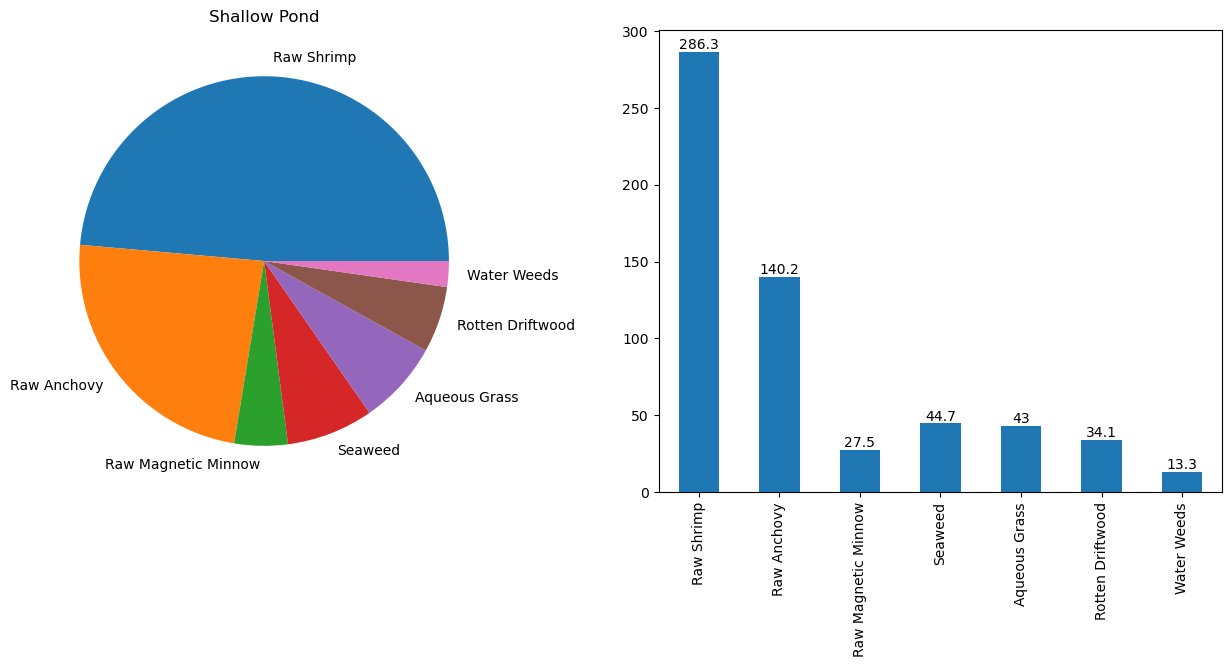

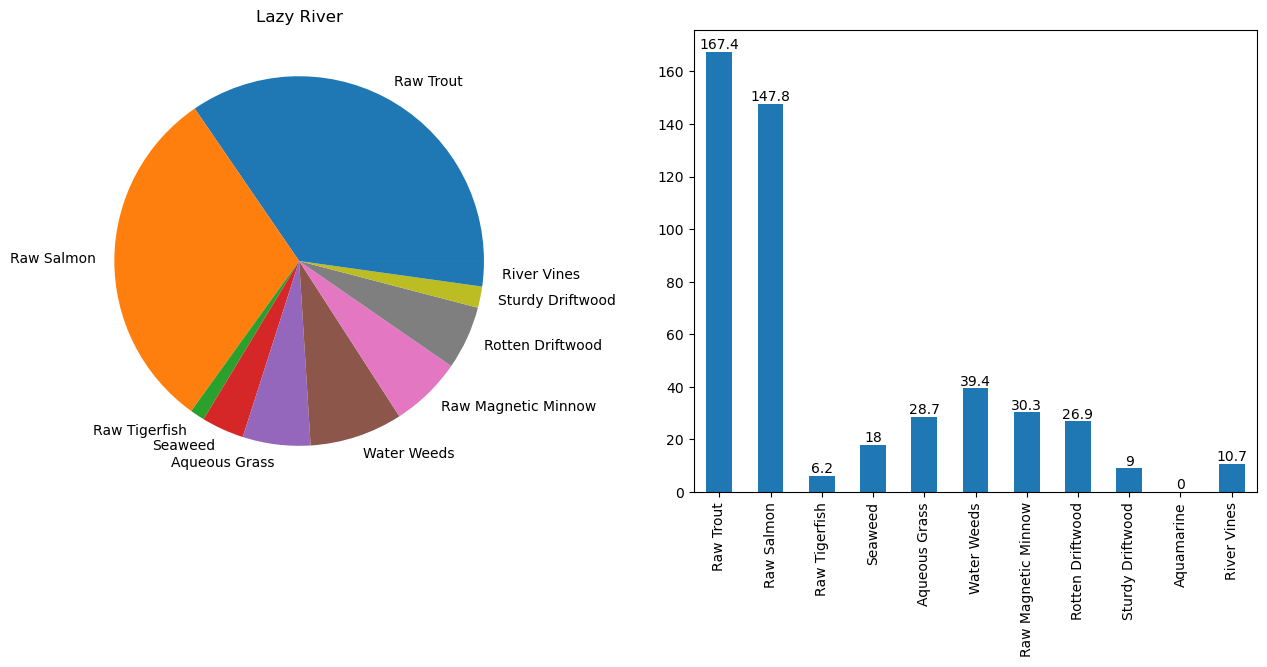

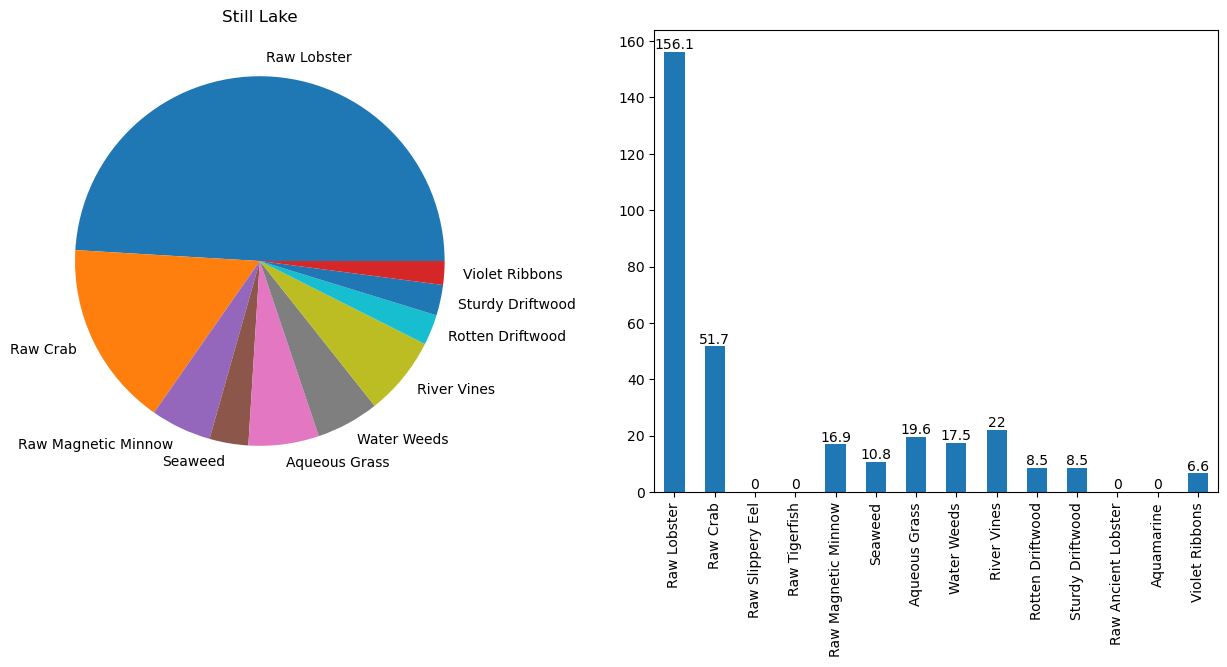

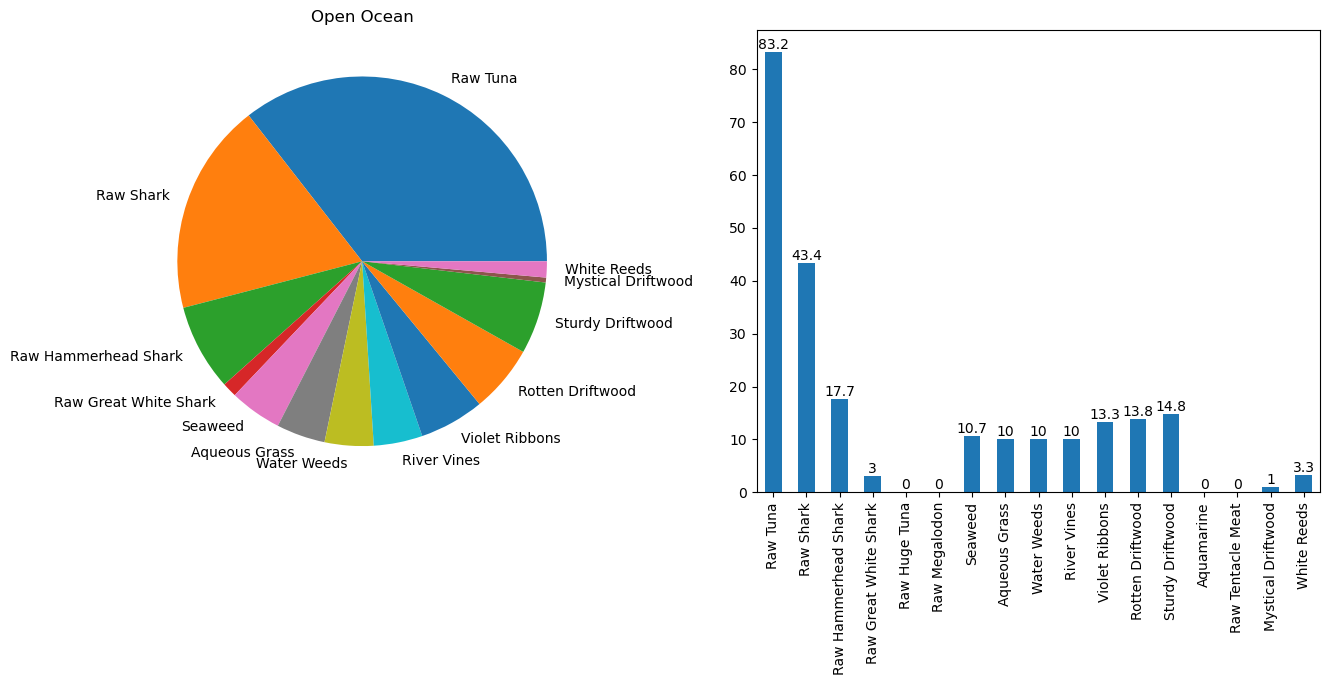

In [19]:
action_summary(fishing)

dict_keys(['Grasslands', 'Verdant Valley', 'Fungal Grotto', 'The Tangle', 'Misty Marsh', 'Frozen Tundra', 'Haunted Woods', 'Living Forest'])

Chili Pepper            67.9
Yellow Pepper           86.9
Chili Pepper Seed       17.0
Wildberry               67.9
Wildberry Bush Seed     17.0
Wheat                   67.9
Wheat Seed              17.0
Peppercorn Seed         17.0
Maple Tree Seed          8.5
Maple Log              203.6
Frost Flowers           54.4
Snow                     1.8
dtype: float64

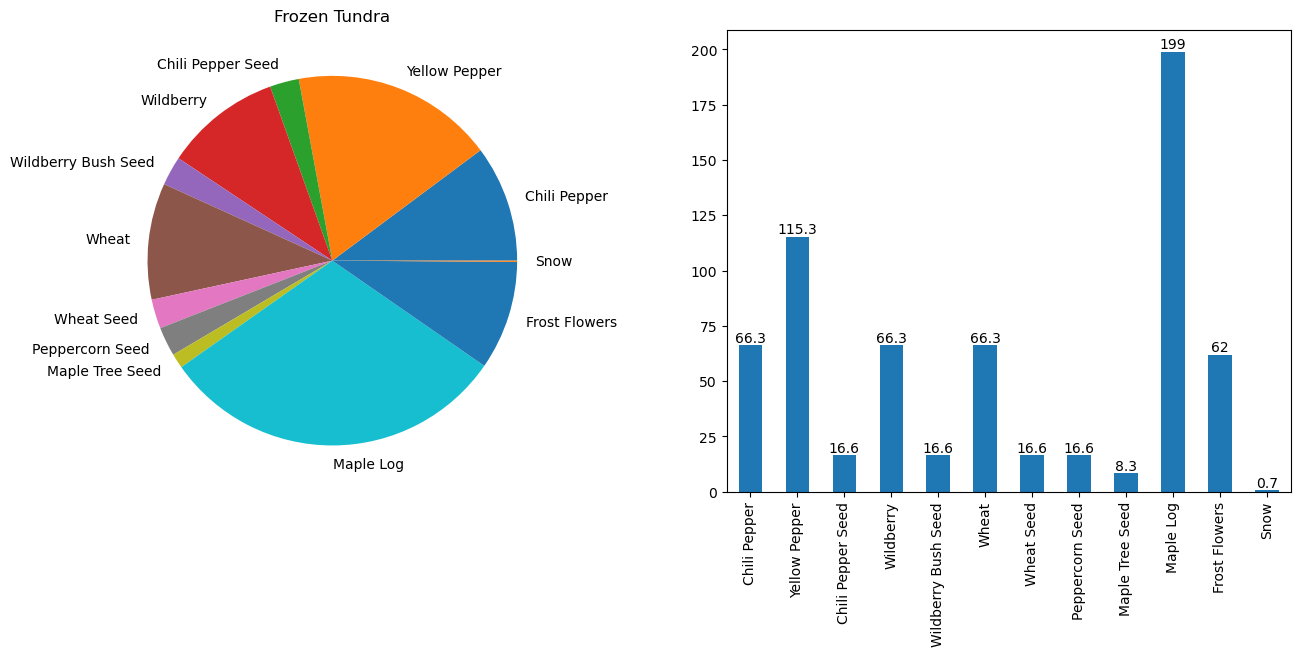

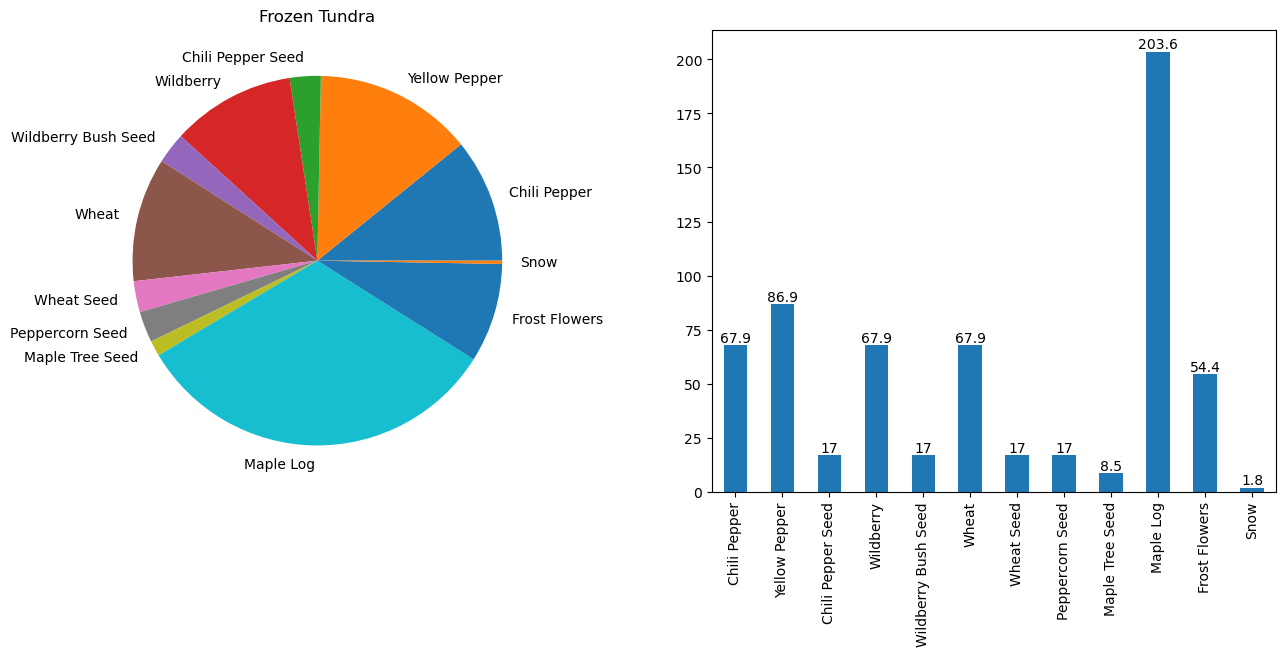

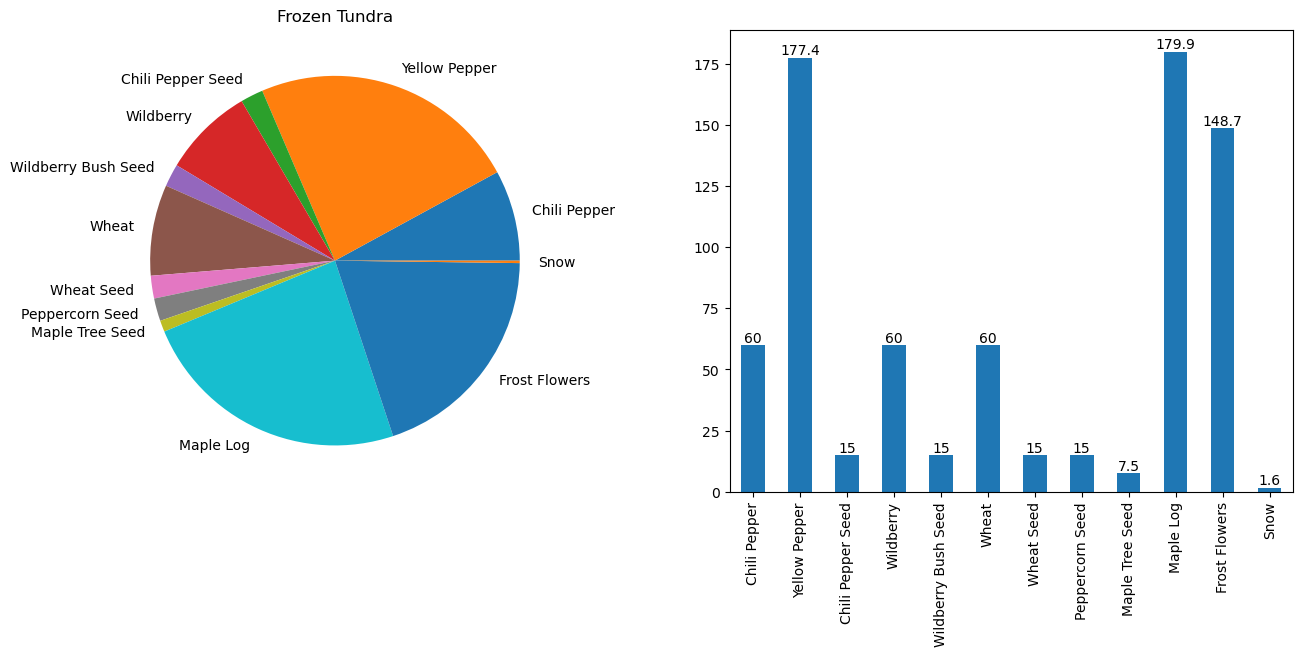

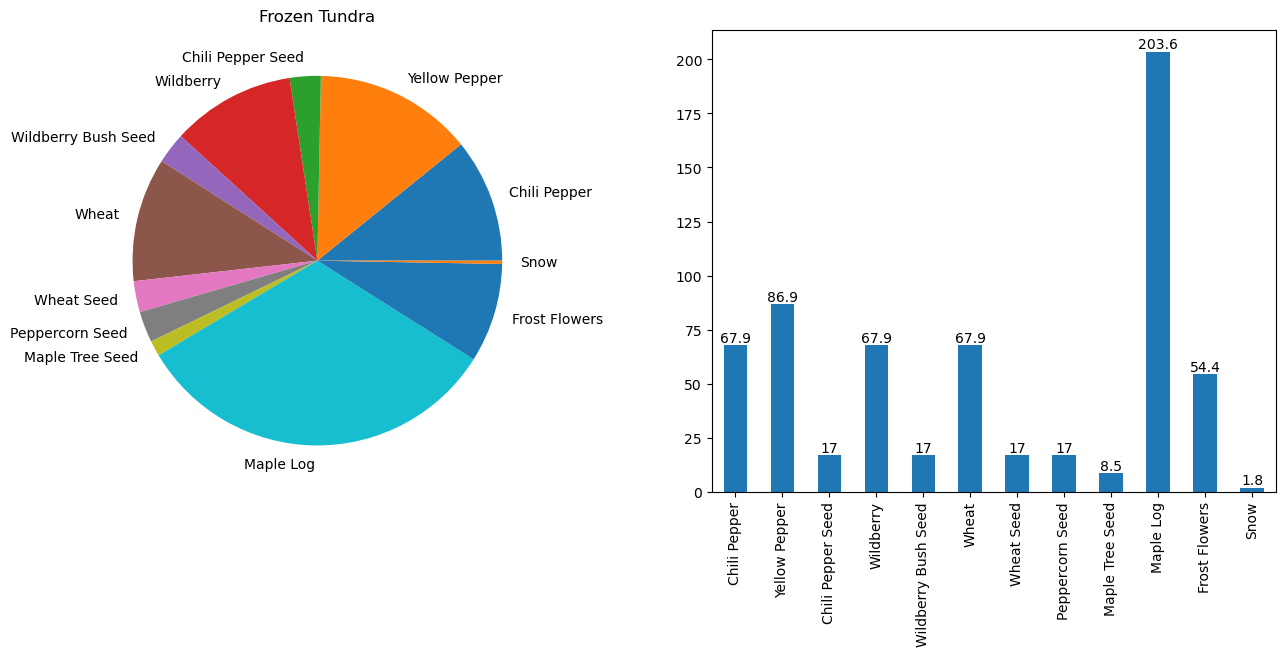

In [6]:
zone = 'Frozen Tundra'
display(foraging.list_of_actions())
#player.enchantments['nature'] = 0
#player.enchantments['herbalist'] = 0
#player.enchantments['seedHarvesting'] = 0
#zone_summary(foraging, zone)

player.enchantments['nature'] = 3
player.enchantments['herbalist'] = 3
player.enchantments['seedHarvesting'] = 3
zone_summary(foraging, zone)

player.enchantments['nature'] = 3
player.enchantments['herbalist'] = 0
player.enchantments['seedHarvesting'] = 0
zone_summary(foraging, zone)

player.enchantments['nature'] = 0
player.enchantments['herbalist'] = 3
player.enchantments['seedHarvesting'] = 0
zone_summary(foraging, zone)

player.enchantments['nature'] = 0
player.enchantments['herbalist'] = 0
player.enchantments['seedHarvesting'] = 3
zone_summary(foraging, zone)


Clay  Copper Ore  Tin Ore  Stone   Sand  \
Clay Pit             737.8       368.9    368.9  184.5  276.7   
City Outskirts Mine  230.6       345.9    345.9  230.6  230.6   
Village Quarry         0.0         0.0      0.0  720.5    0.0   
Desert Mine           33.0         0.0      0.0    0.0  366.2   
Underground Mine       0.0         0.0      0.0   77.6    0.0   
Hidden Mine            0.0         0.0      0.0   93.2    0.0   
Volcano Mine           0.0         0.0      0.0    0.0    0.0   
Slate Spires           0.0         0.0      0.0  285.2  285.2   
Deep Pit               0.0         0.0      0.0    0.0    0.0   

                     Fat Nightcrawler Bait  Iron Ore   Coal  Mithril Ore  \
Clay Pit                              18.4       0.0    0.0          0.0   
City Outskirts Mine                   11.5      57.6   57.6          0.0   
Village Quarry                        11.5     576.4  432.3          0.0   
Desert Mine                            0.0      65.9   73.2        146.5   
Underground Mine                       0.0      38.8   38.8        232.9   
Hidden Mine                            0.0       0.0    0.0         62.1   
Volcano Mine                           0.0       0.0    0.0        124.2   
Slate Spires                           0.0       0.0    0.0          0.0   
Deep Pit                               0.0       0.0    0.0          0.0   

                     Silver   Salt  Rune Slate  Gold Ore  Adamantite Ore  \
Clay Pit                0.0    0.0         0.0       0.0             0.0   
City Outskirts Mine     0.0    0.0         0.0       0.0             0.0   
Village Quarry          0.0    0.0         0.0       0.0             0.0   
Desert Mine           146.5   73.2        65.9      36.6             0.0   
Underground Mine       97.0  155.2       116.4     135.8             0.0   
Hidden Mine           124.2    0.0        62.1      62.1           217.4   
Volcano Mine          124.2    0.0        62.1      62.1           124.2   
Slate Spires            0.0    0.0      2376.3       0.0             0.0   
Deep Pit                0.0    0.0        69.9     104.8             0.0   

                     Runite Ore  Stygian Ore  Void Stone  
Clay Pit                    0.0          0.0         0.0  
City Outskirts Mine         0.0          0.0         0.0  
Village Quarry              0.0          0.0         0.0  
Desert Mine                 0.0          0.0         0.0  
Underground Mine            0.0          0.0         0.0  
Hidden Mine                31.0          0.0         0.0  
Volcano Mine              124.2          0.0         0.0  
Slate Spires                0.0          0.0         0.0  
Deep Pit                  232.9         69.9        23.3

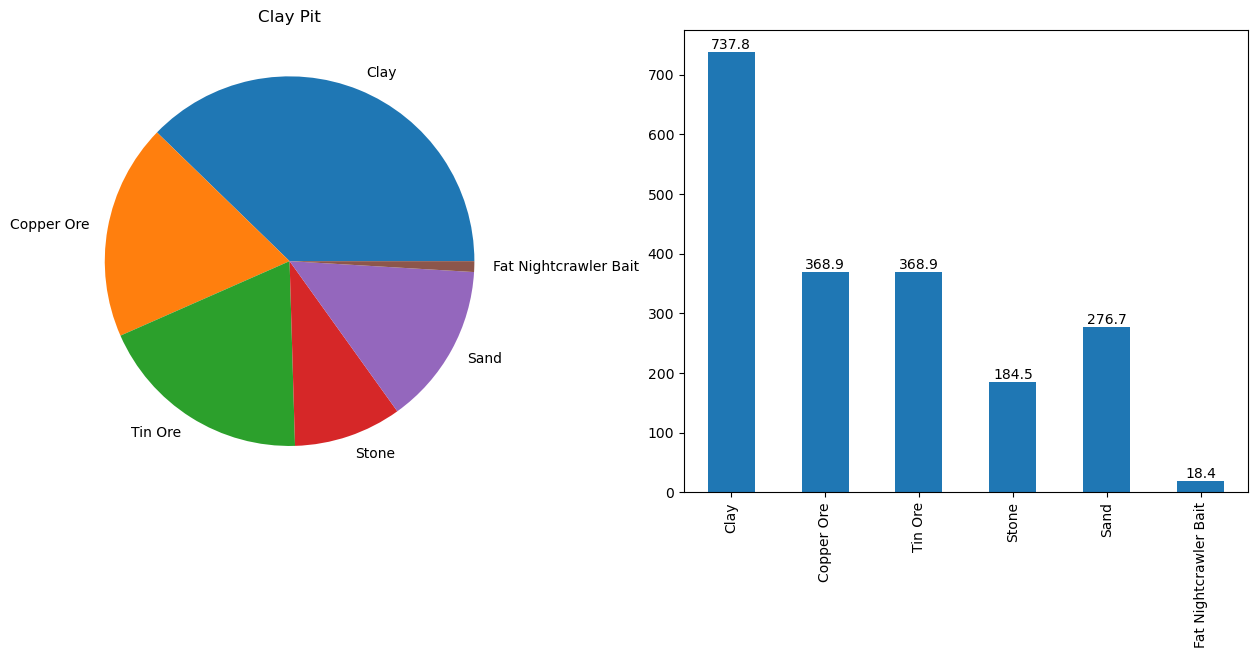

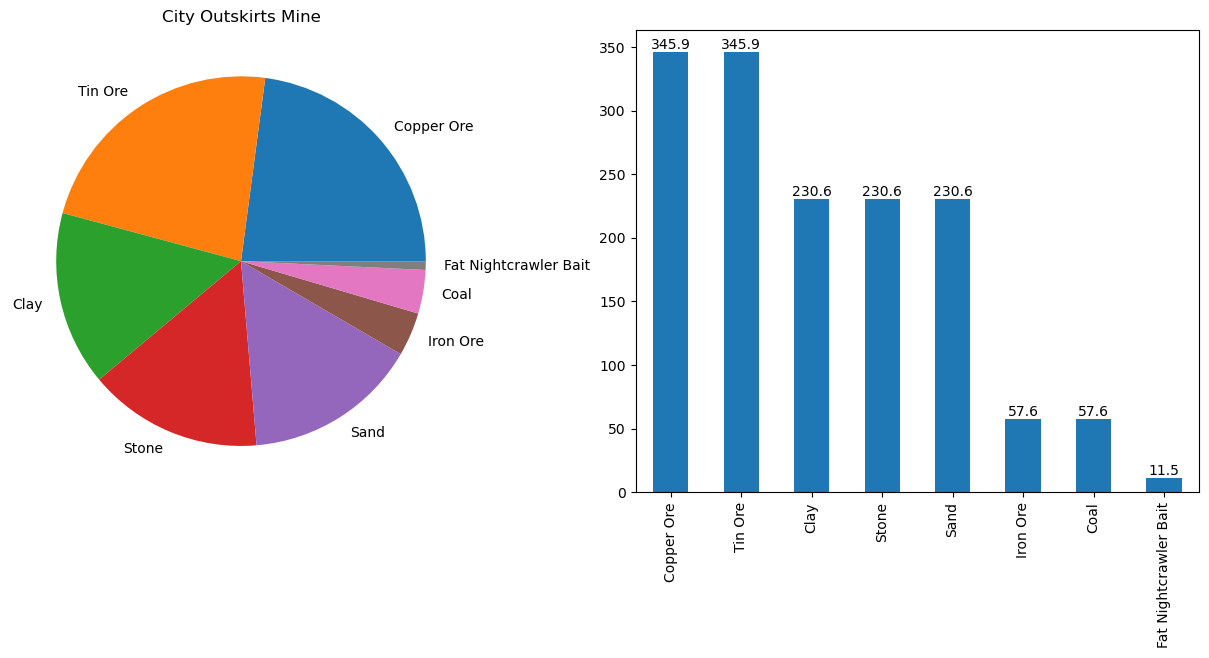

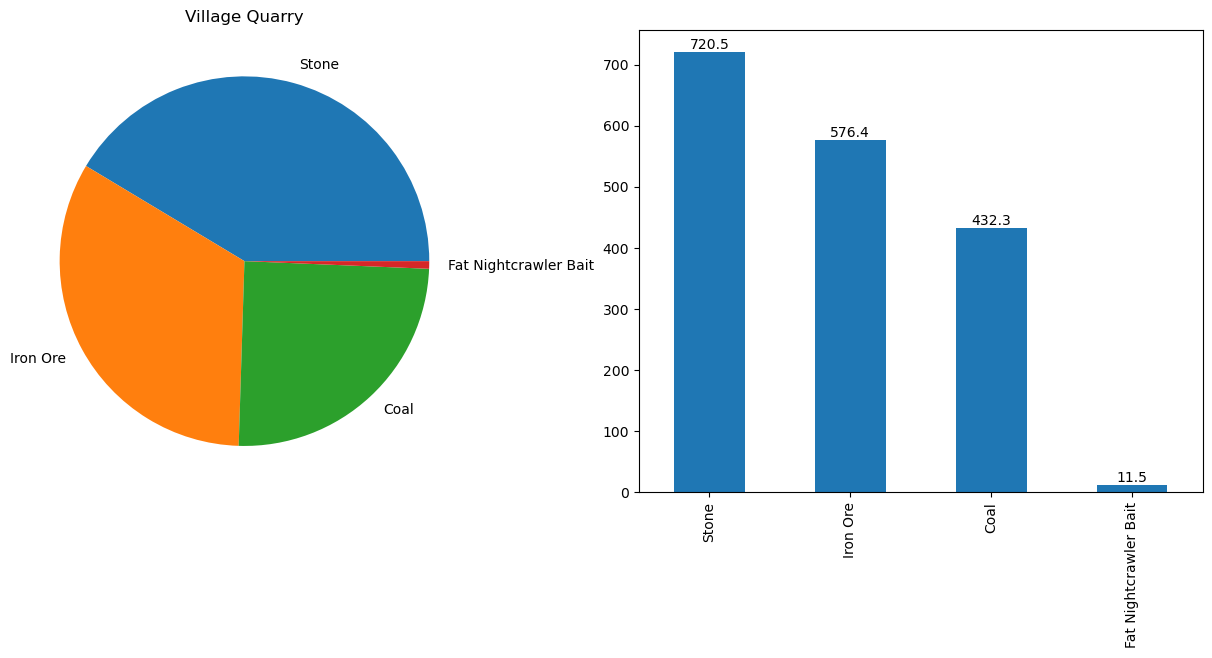

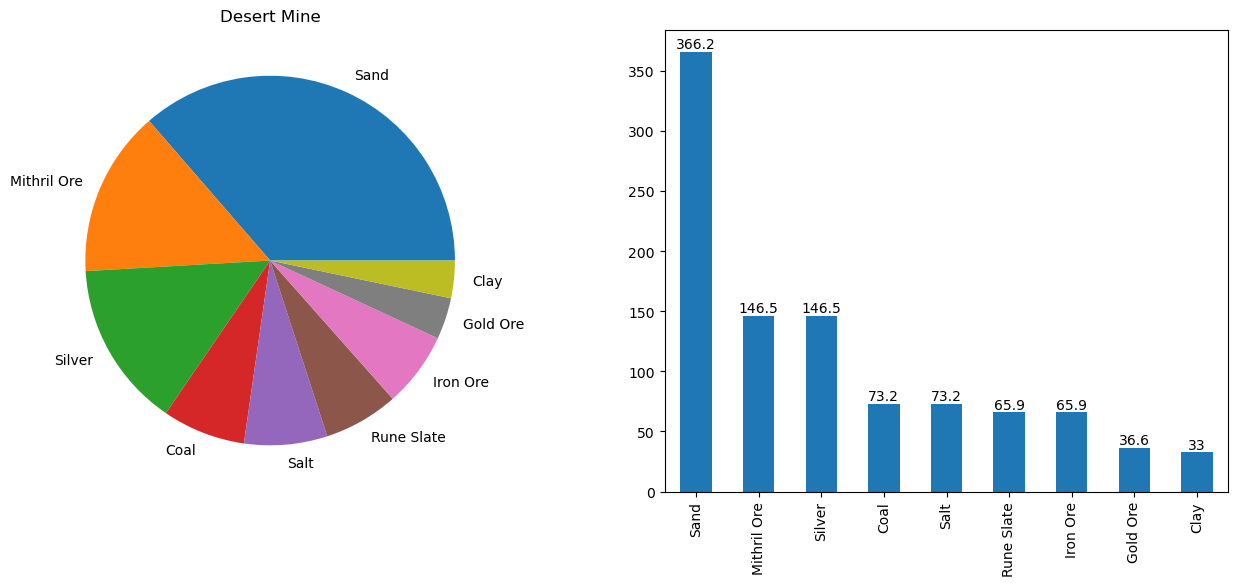

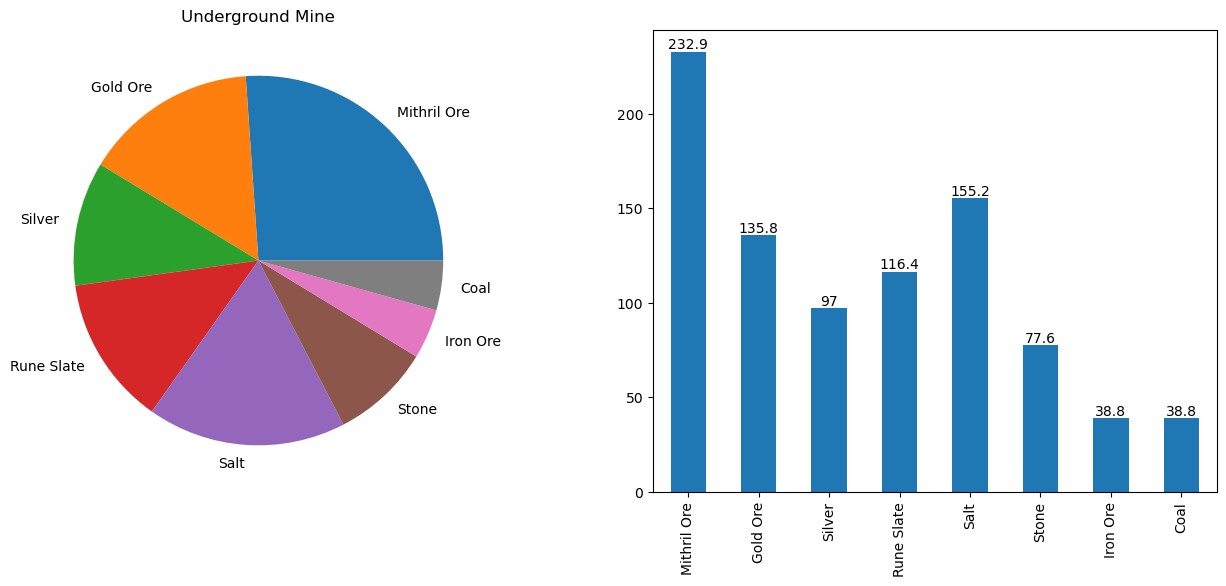

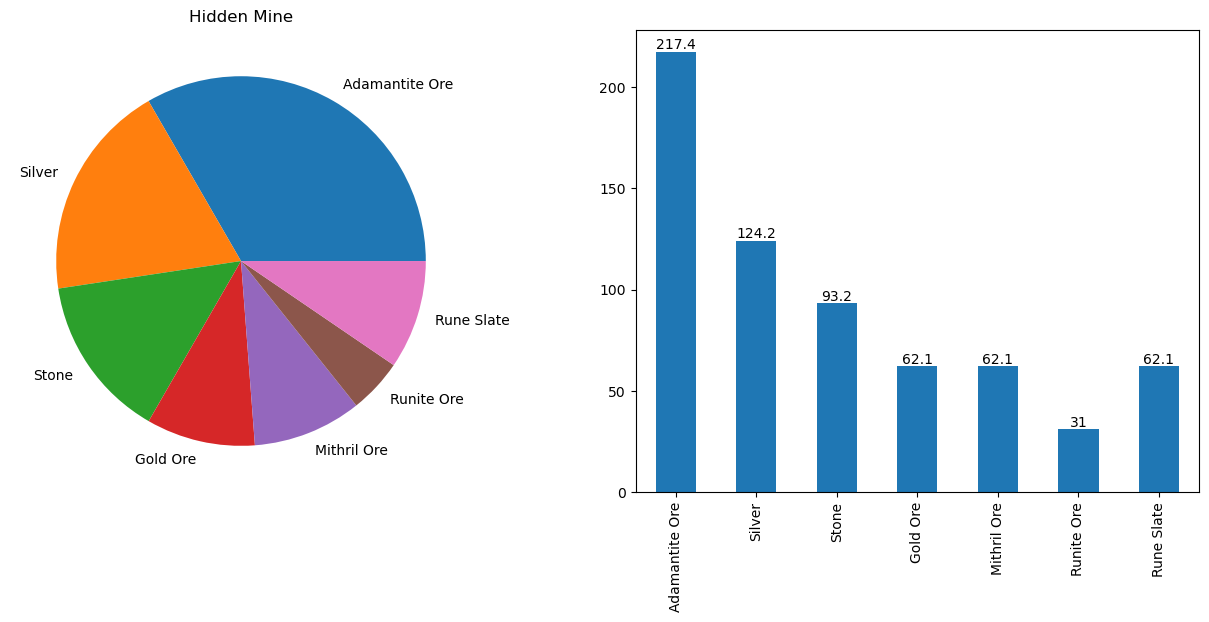

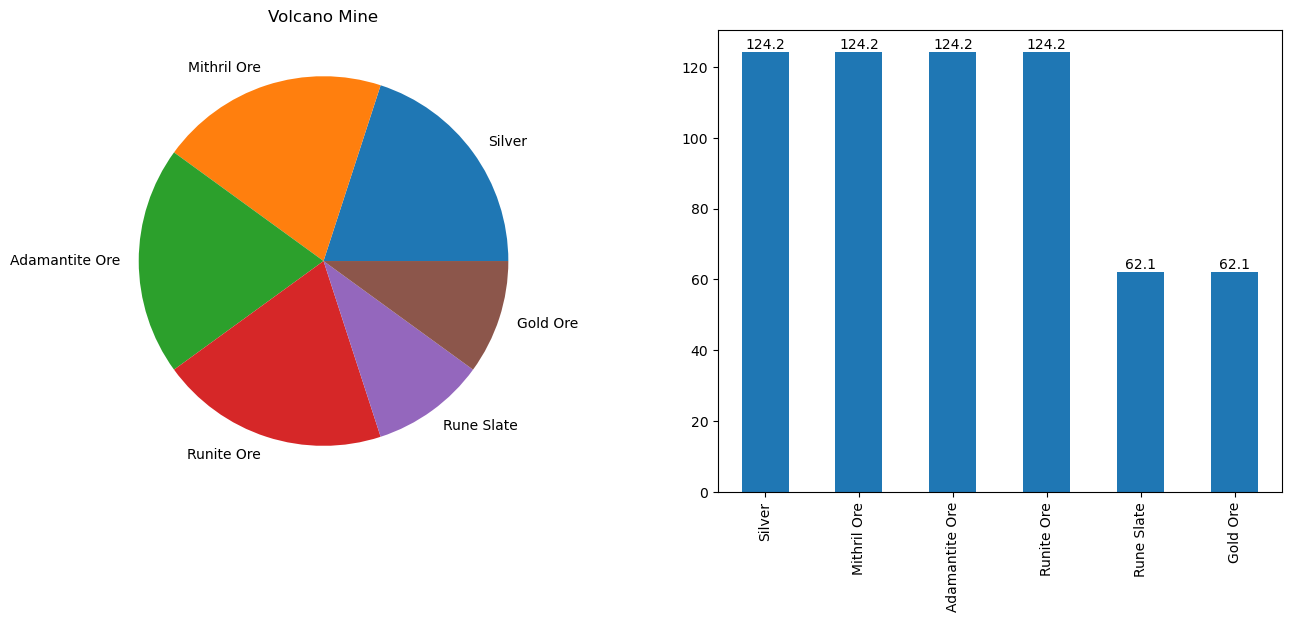

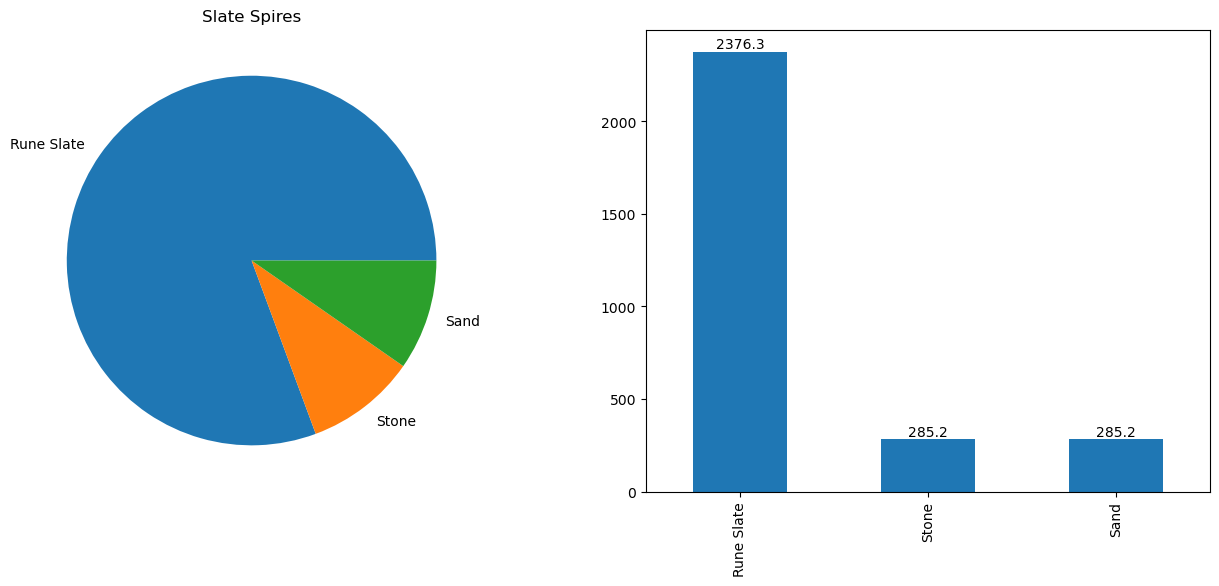

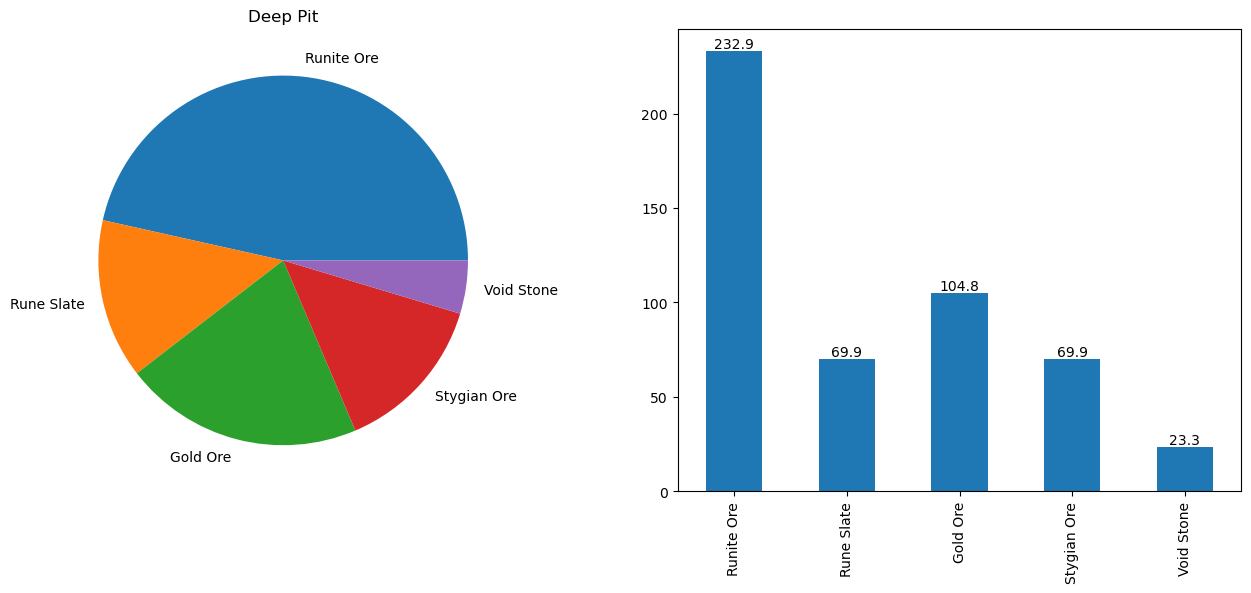

In [7]:
action_summary(mining)

Carrot Seed  Honey  Carrot  Potato  Potato Seed  Wildberry  \
Grasslands             43.5   29.7    28.5    28.5         36.7       70.3   
Verdant Valley         19.6   88.9    15.8     0.0          0.0        0.0   
Fungal Grotto          42.1    0.0   116.7   116.7         42.1        0.0   
The Tangle              0.0    0.0     0.0     0.0          0.0        0.0   
Misty Marsh             0.0    0.0     0.0    26.6         29.9        0.0   
Frozen Tundra           0.0    0.0     0.0     0.0          0.0       66.3   
Haunted Woods           0.0    0.0     0.0     0.0          0.0        0.0   
Living Forest           0.0   16.3     0.0     0.0          0.0        0.0   

                Wildberry Bush Seed  Branch    Log  Glowbug Bait  ...  Snow  \
Grasslands                     37.3  1227.4  593.1          52.4  ...   0.0   
Verdant Valley                  0.0   748.9  247.6          36.7  ...   0.0   
Fungal Grotto                   0.0   209.9   85.2          20.0  ...   0.0   
The Tangle                      0.0   128.6  128.6           5.6  ...   0.0   
Misty Marsh                     0.0     0.0    0.0           1.5  ...   0.0   
Frozen Tundra                  16.6     0.0    0.0           0.0  ...   0.7   
Haunted Woods                   0.0     0.0    0.0           0.0  ...   0.0   
Living Forest                   0.0     0.0    0.0           0.0  ...   0.0   

                Yew Tree Seed  Yew Log  Mandrake  Black Berry  Fairy Dust  \
Grasslands                0.0      0.0       0.0          0.0         0.0   
Verdant Valley            0.0      0.0       0.0          0.0         0.0   
Fungal Grotto             0.0      0.0       0.0          0.0         0.0   
The Tangle                0.0      0.0       0.0          0.0         0.0   
Misty Marsh               0.0      0.0       0.0          0.0         0.0   
Frozen Tundra             0.0      0.0       0.0          0.0         0.0   
Haunted Woods            20.3     46.2      27.4         27.4        27.4   
Living Forest             2.5     45.7       0.0          0.0        30.4   

                Lotus Flower  Durian  Elder Log  Elder Tree Seed  
Grasslands               0.0     0.0        0.0              0.0  
Verdant Valley           0.0     0.0        0.0              0.0  
Fungal Grotto            0.0     0.0        0.0              0.0  
The Tangle               0.0     0.0        0.0              0.0  
Misty Marsh              0.0     0.0        0.0              0.0  
Frozen Tundra            0.0     0.0        0.0              0.0  
Haunted Woods            0.0     0.0        0.0              0.0  
Living Forest           30.4    30.4       28.2              0.6  

[8 rows x 56 columns]

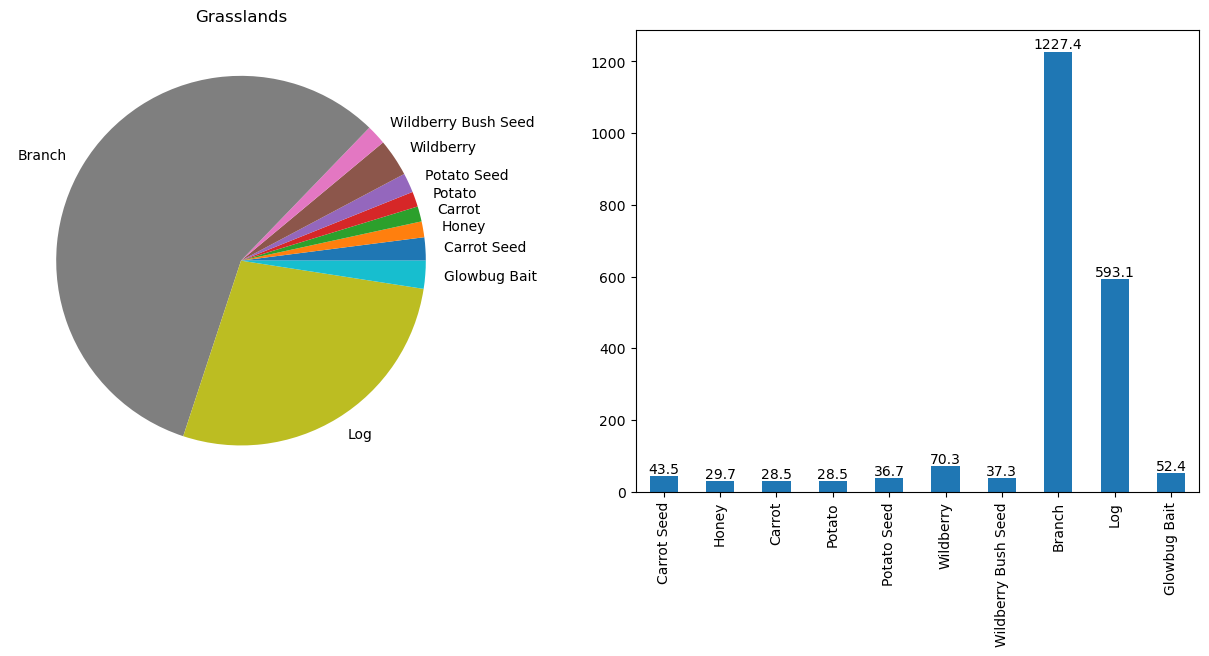

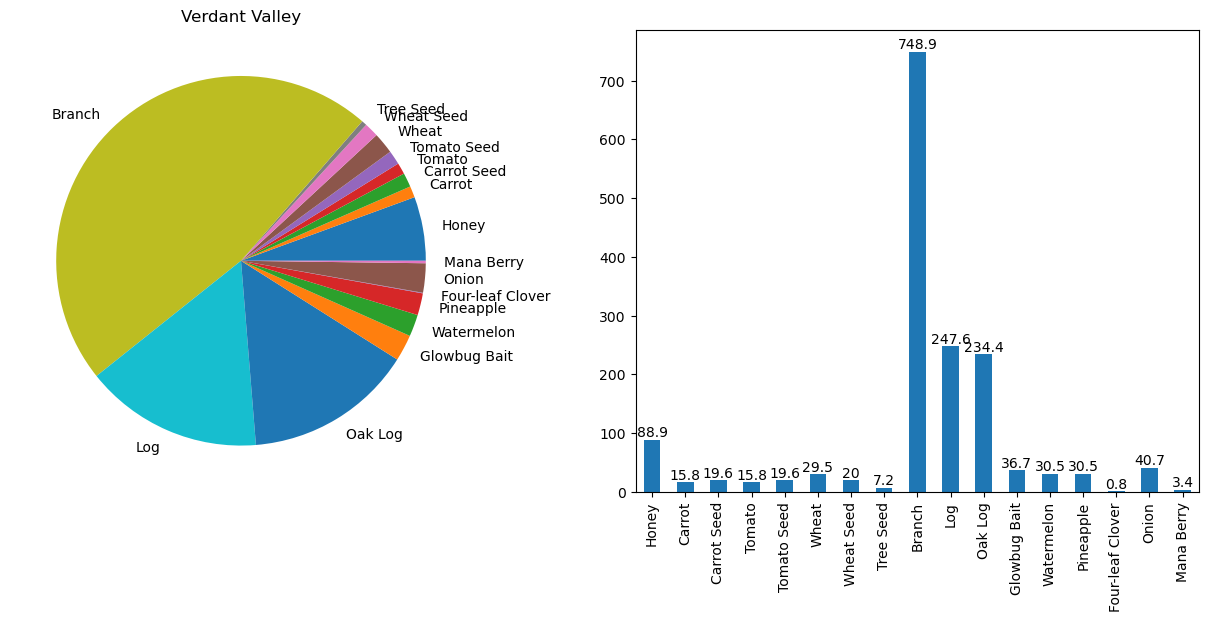

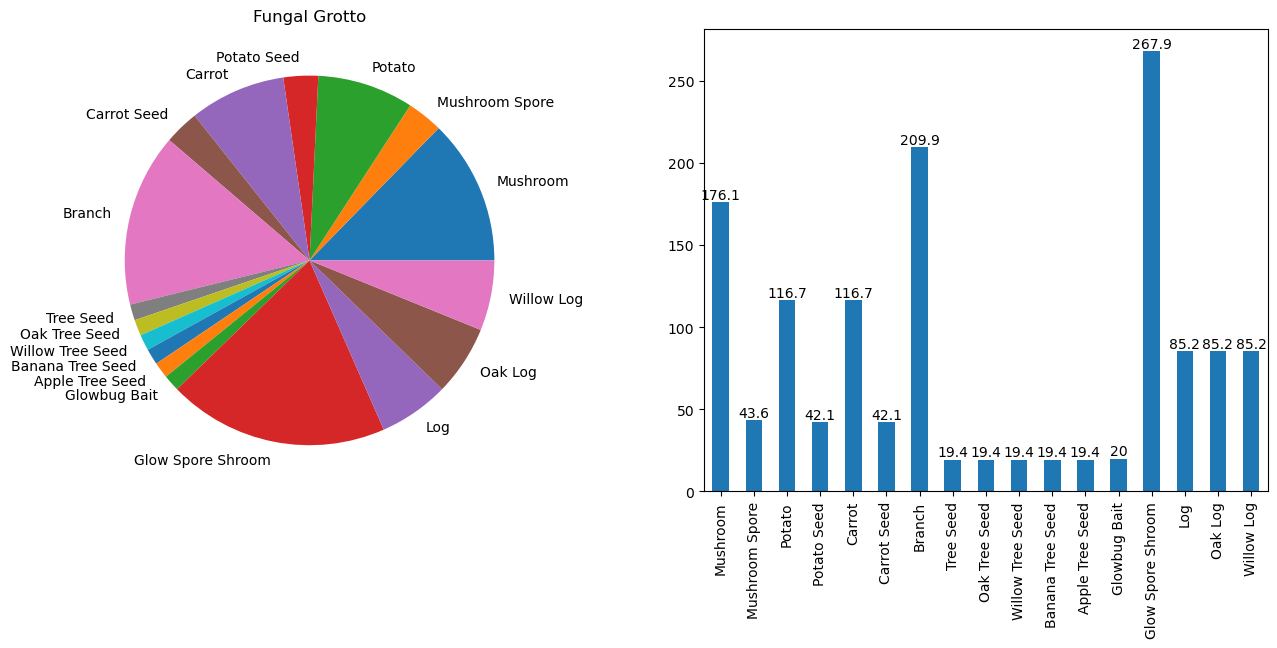

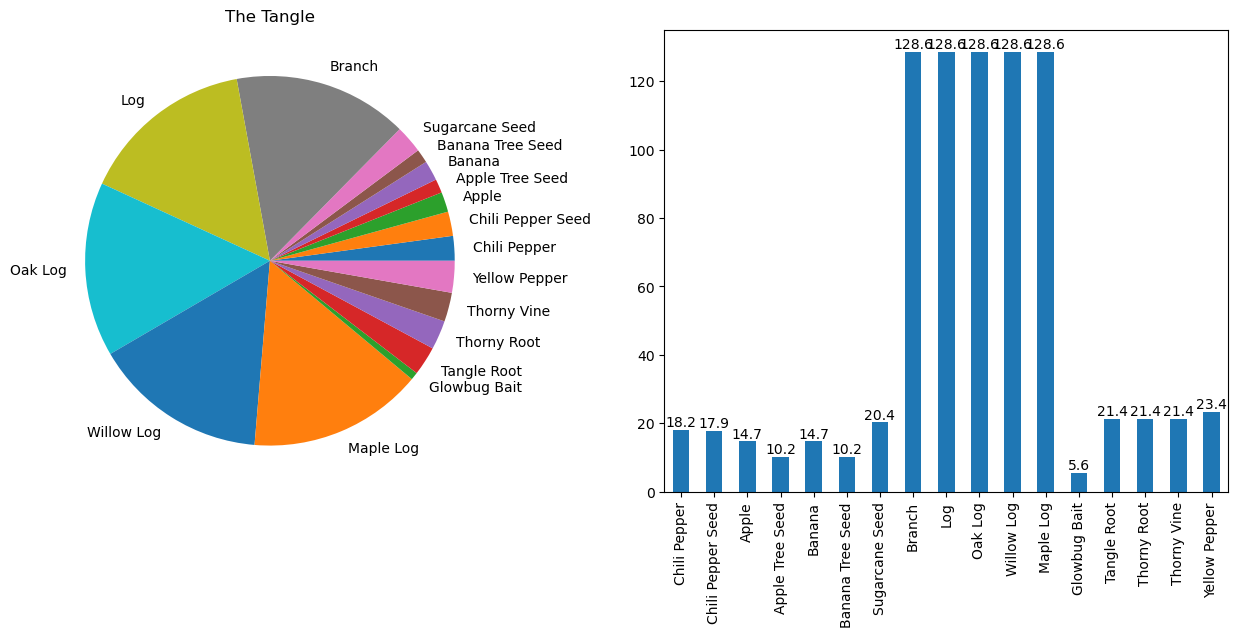

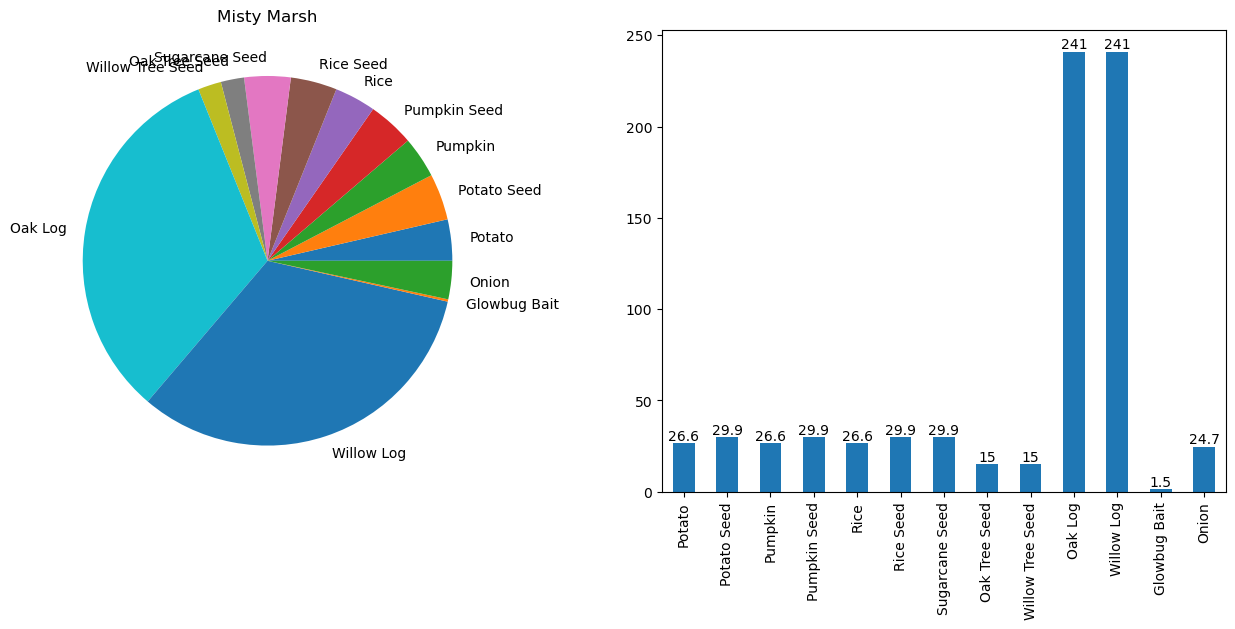

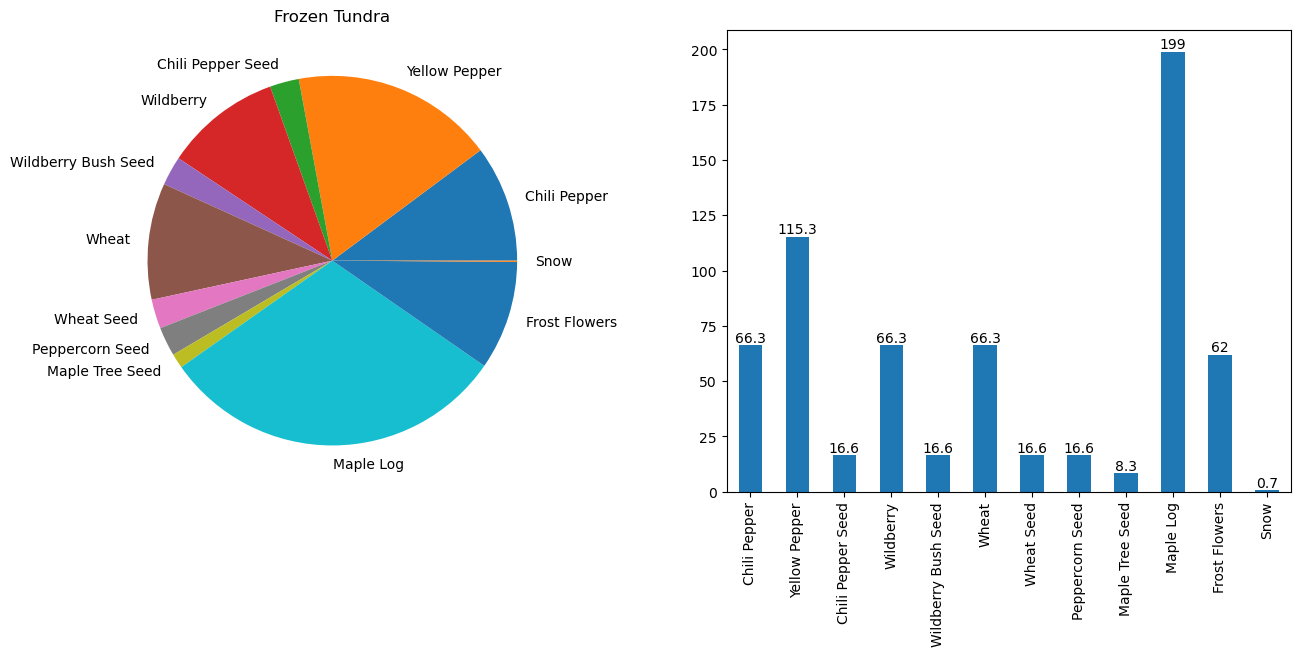

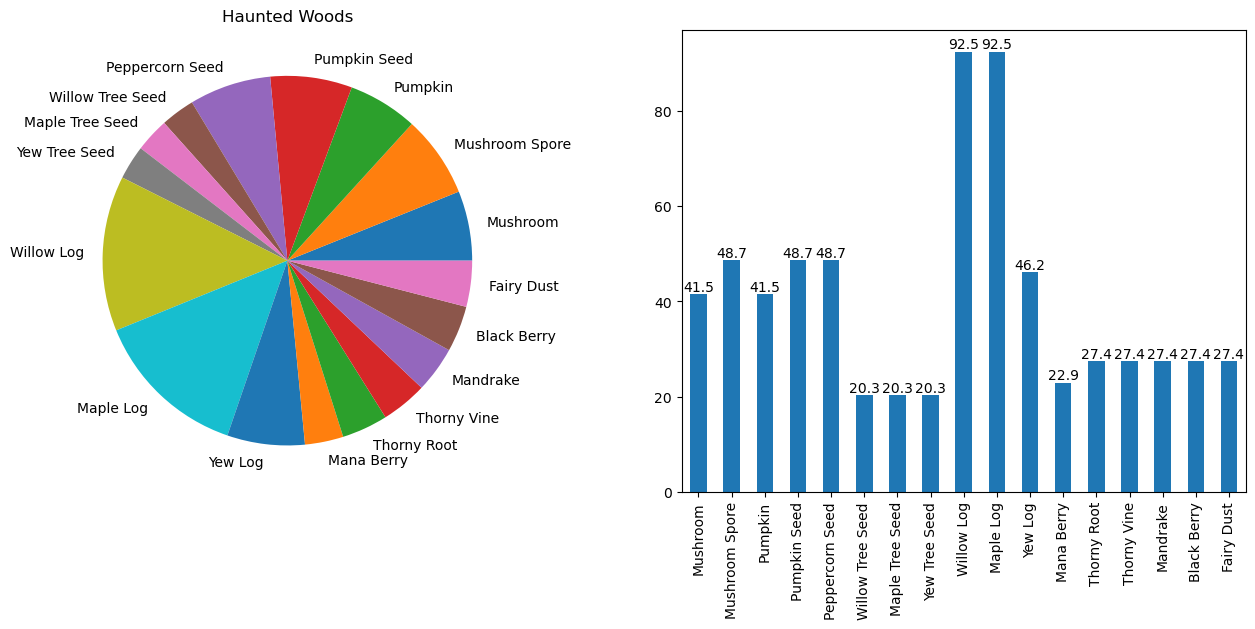

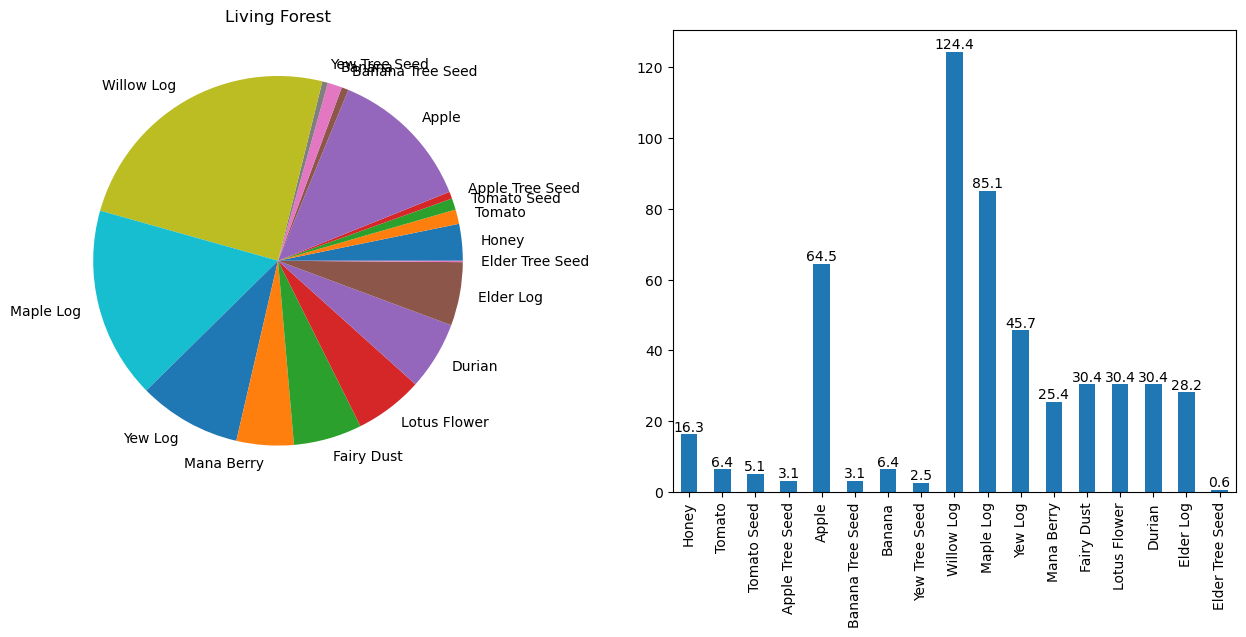

In [8]:
player.enchantments['nature'] = 3
player.enchantments['herbalist'] = 3
player.enchantments['seedHarvesting'] = 3
action_summary(foraging)

Raw Shrimp  Raw Anchovy  Raw Magnetic Minnow  Seaweed  \
Shallow Pond       285.3        139.3                 27.2     44.4   
Lazy River           0.0          0.0                 30.3     18.1   
Still Lake           0.0          0.0                 16.9     10.9   
Open Ocean           0.0          0.0                  0.0     10.7   
Stormy Seas          0.0          0.0                  0.0      0.0   

              Aqueous Grass  Rotten Driftwood  Water Weeds  Raw Trout  \
Shallow Pond           42.9              33.9         13.2        0.0   
Lazy River             28.8              27.0         39.5      168.5   
Still Lake             19.7               8.4         17.6        0.0   
Open Ocean              9.9              13.7          9.9        0.0   
Stormy Seas             0.0               0.0          0.0        0.0   

              Raw Salmon  Raw Tigerfish  ...  Raw Tuna  Raw Shark  \
Shallow Pond         0.0            0.0  ...       0.0        0.0   
Lazy River         148.5            6.2  ...       0.0        0.0   
Still Lake           0.0            0.0  ...       0.0        0.0   
Open Ocean           0.0            0.0  ...      82.6       43.2   
Stormy Seas          0.0            0.0  ...       0.0        0.0   

              Raw Hammerhead Shark  Raw Great White Shark  Raw Huge Tuna  \
Shallow Pond                   0.0                    0.0            0.0   
Lazy River                     0.0                    0.0            0.0   
Still Lake                     0.0                    0.0            0.0   
Open Ocean                    17.6                    3.0            0.0   
Stormy Seas                    0.0                    0.0            0.0   

              Raw Megalodon  Raw Tentacle Meat  Mystical Driftwood  \
Shallow Pond            0.0                0.0                 0.0   
Lazy River              0.0                0.0                 0.0   
Still Lake              0.0                0.0                 0.0   
Open Ocean              0.0                0.0                 1.0   
Stormy Seas             0.0                0.0                 0.0   

              White Reeds  Ancient Kelp  
Shallow Pond          0.0           0.0  
Lazy River            0.0           0.0  
Still Lake            0.0           0.0  
Open Ocean            3.3           0.0  
Stormy Seas           0.0           0.0  

[5 rows x 28 columns]

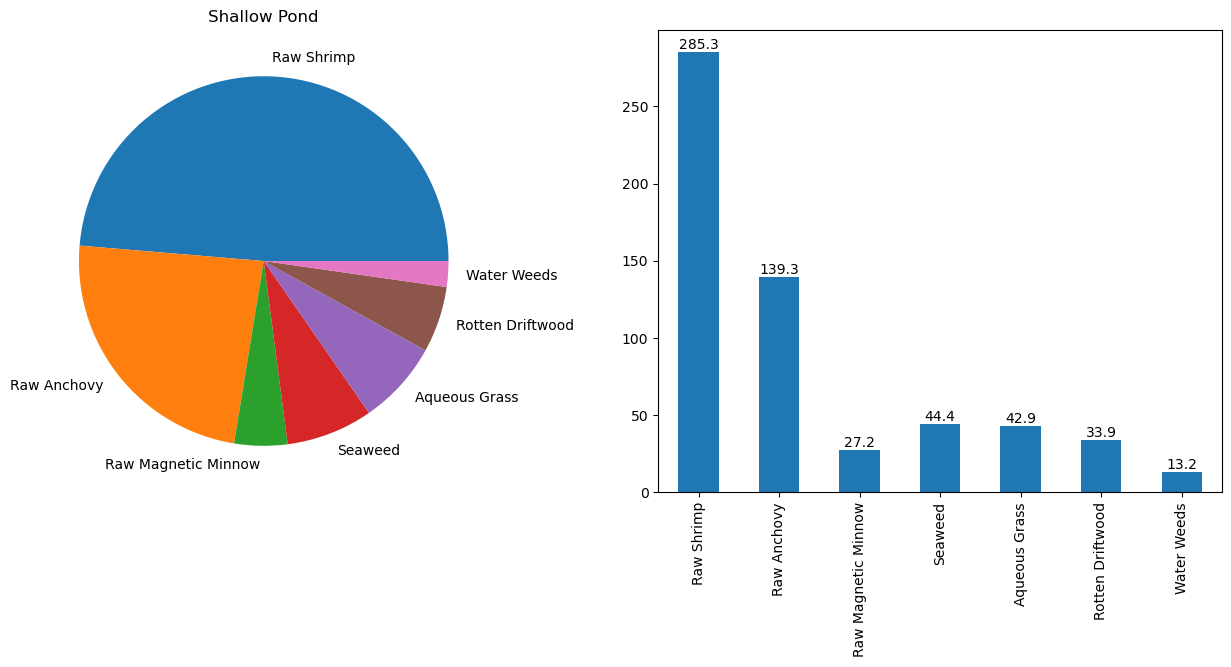

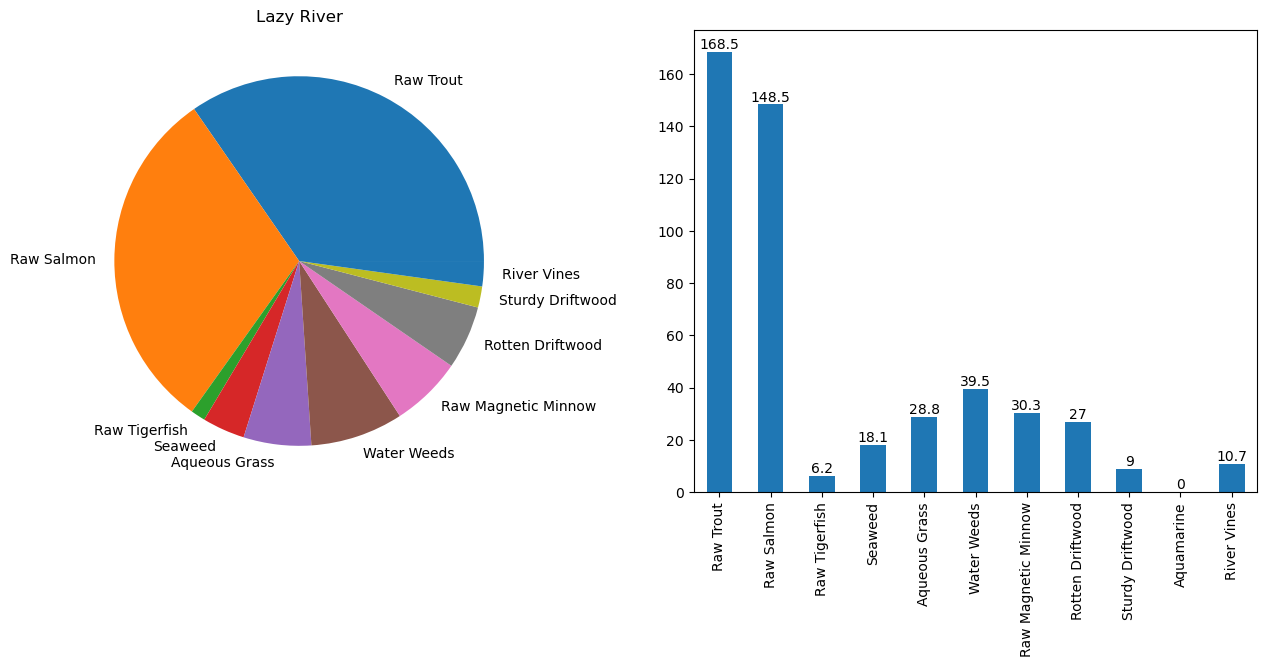

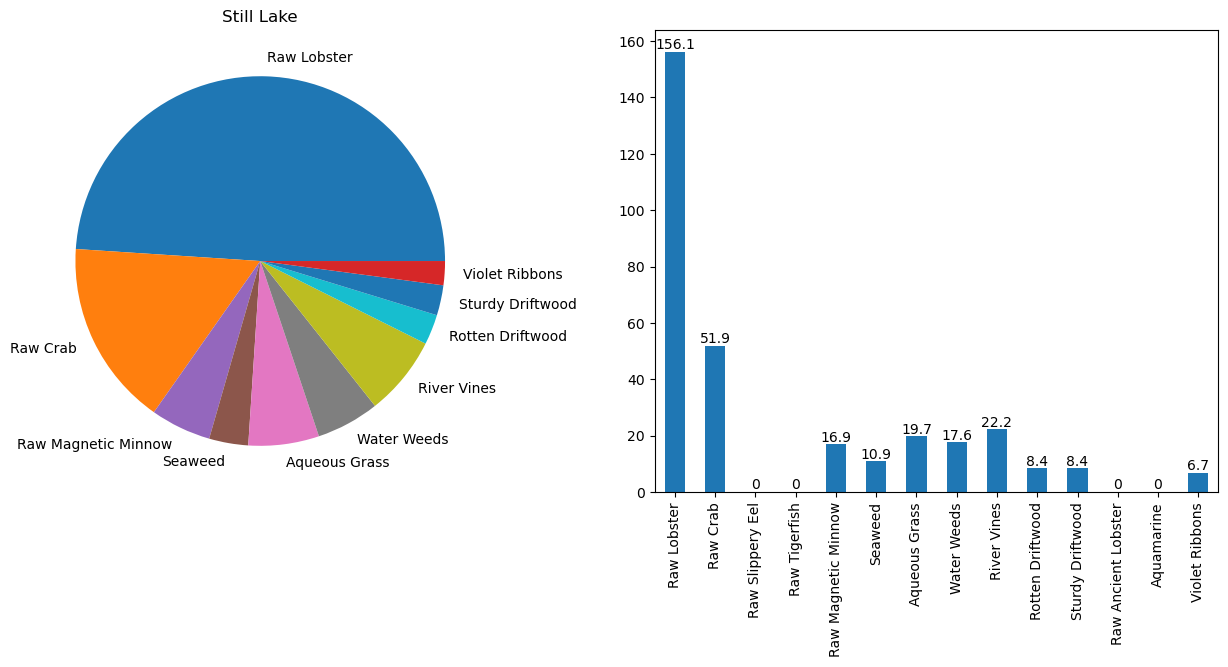

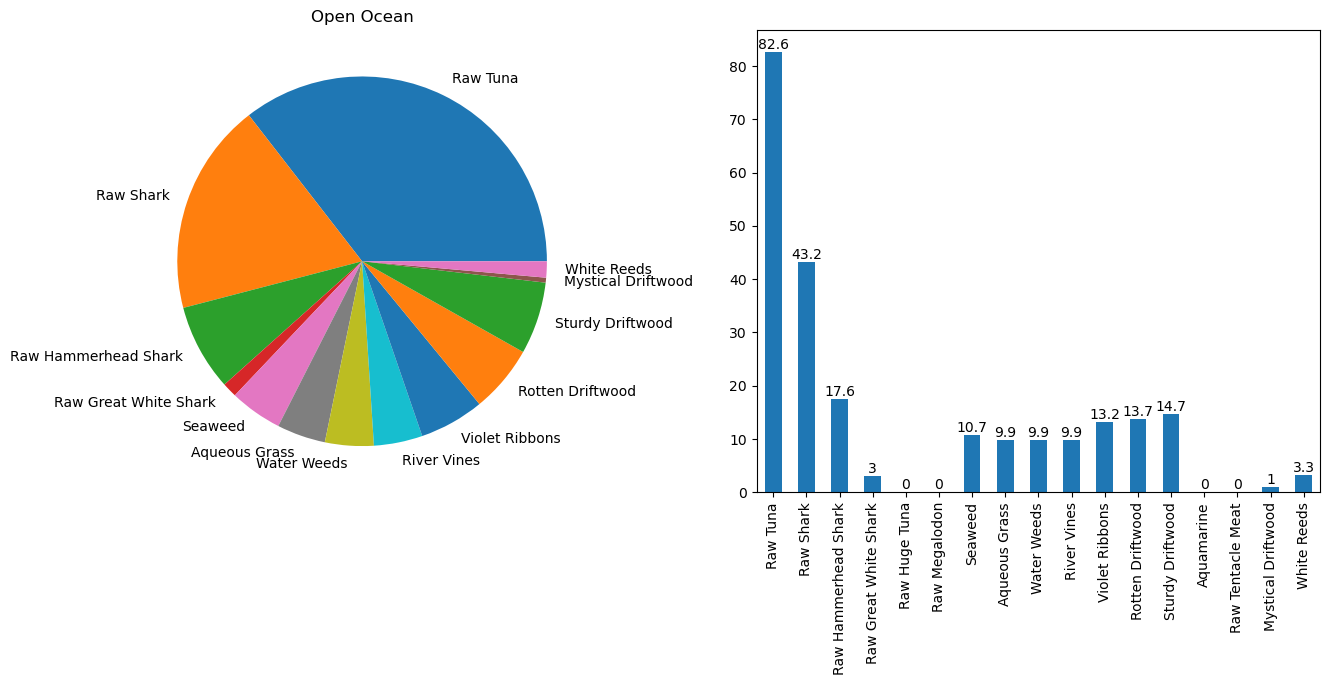

In [9]:
action_summary(fishing)

In [10]:
# Things needed for MC generation
display(f'Zone levels: {[ loc.level for (k, loc) in fishing.locations.items() ]}')
# Min / Max bases
fishing.locations['Shallow Pond'].nodes['Shallow Flora'].minimum_base_amount
low = np.unique(np.concatenate([ [n.minimum_base_amount for (z, n) in v.nodes.items() ] for (k, v) in fishing.locations.items() ]))
high = np.unique(np.concatenate([ [n.maximum_base_amount for (z, n) in v.nodes.items() ] for (k, v) in fishing.locations.items() ]))
delta = np.max(high) - np.min(low)
display(f'Min: {low}, Max: {high} -> Delta: {delta}')

'Zone levels: [1, 20, 50, 65, 85]'

'Min: [1 2 3 4 5], Max: [ 1  2  3  4  6  7  8  9 12] -> Delta: 11'

In [11]:
with open('data/locations.json') as j:
    data = json.load(j)
    
#for (k, v) in data.items():
#    print(k, v['name'])
#display(data.keys())
display(data['154']['accessRequirements']['requiredSkills'])
display(data['56']['accessRequirements']['requiredSkills'])
#data['154']['accessRequirements']['requiredSkills']

[{'skill': 'fishing', 'level': 65}]

[{'skill': 'mining', 'level': 60}]

In [12]:
def pretty_print_loc(action, location_name):
    loc = action.locations[location_name]
    for (k, node) in loc.nodes.items():
        print(f'~~~ {k} ~~~' )
        print(f'{"":<4}{node.tags}: {node.frequency} -> {node.max_frequency} :: {node.minimum_base_amount} - {node.maximum_base_amount}')
        for (k, v) in node.loot.items():
            iname = action.player.item_data[str(k)]['name']
            iexp = action.player.item_data[str(k)].get('experience', 0)
            min_count = v.min_amount
            max_count = v.max_amount
            freq = v.frequency
            print(f'{"":<4}{iname:<25} {min_count:>10} -> {max_count} ({(max_count+min_count)/2:0.1f}) ... [{freq:>5}]')
            #if iname not in item_name:
            #    item_name.append(iname)
            #    item_xp.append(iexp)
            #    item_id.append(k)
            
def zone_summary_pretty(action):
    display(action.list_of_actions())
    for locname in action.list_of_actions():
        print(locname)
        pretty_print_loc(action, locname)
#zone_summary_pretty(fishing)
#pretty_print_loc(fishing, 'Open Ocean')
#pretty_print_loc(mining, 'Ocean')
zone_summary_pretty(mining)

dict_keys(['Clay Pit', 'City Outskirts Mine', 'Village Quarry', 'Desert Mine', 'Underground Mine', 'Hidden Mine', 'Volcano Mine', 'Slate Spires', 'Deep Pit'])

Clay Pit
~~~  ~~~
    []: 1 -> 1 :: 1 - 1
    Clay                               1 -> 1 (1.0) ... [   40]
    Copper Ore                         1 -> 1 (1.0) ... [   20]
    Tin Ore                            1 -> 1 (1.0) ... [   20]
    Stone                              1 -> 1 (1.0) ... [   10]
    Sand                               1 -> 2 (1.5) ... [   10]
    Fat Nightcrawler Bait              1 -> 1 (1.0) ... [    1]
City Outskirts Mine
~~~  ~~~
    []: 1 -> 1 :: 1 - 1
    Copper Ore                         1 -> 1 (1.0) ... [   30]
    Tin Ore                            1 -> 1 (1.0) ... [   30]
    Clay                               1 -> 3 (2.0) ... [   10]
    Stone                              1 -> 3 (2.0) ... [   10]
    Sand                               1 -> 3 (2.0) ... [   10]
    Iron Ore                           1 -> 1 (1.0) ... [    5]
    Coal                               1 -> 1 (1.0) ... [    5]
    Fat Nightcrawler Bait              1 -> 1 (1.0) ... [    1]
Village Q

In [13]:
player.item_data['4020']

fishing.locations['Open Ocean'].nodes['Ocean Flora'].loot[4020].item_class

'fiber'